In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-state-shapeflies/cb_2018_us_state_500k.prj
/kaggle/input/usa-state-shapeflies/cb_2018_us_state_500k.shp
/kaggle/input/usa-state-shapeflies/cb_2018_us_state_500k.shp.ea.iso.xml
/kaggle/input/usa-state-shapeflies/cb_2018_us_state_500k.cpg
/kaggle/input/usa-state-shapeflies/cb_2018_us_state_500k.dbf
/kaggle/input/usa-state-shapeflies/cb_2018_us_state_500k.shx
/kaggle/input/usa-state-shapeflies/cb_2018_us_state_500k.shp.iso.xml
/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv
/kaggle/input/widsdatathon2024-challenge1/training.csv
/kaggle/input/widsdatathon2024-challenge1/test.csv


In [5]:
import geopandas as gpd

# **Let's read data in**

In [6]:
test = pd.read_csv('/kaggle/input/widsdatathon2024-challenge1/test.csv')
train = pd.read_csv('/kaggle/input/widsdatathon2024-challenge1/training.csv')
shape = gpd.read_file('/kaggle/input/usa-state-shapeflies/cb_2018_us_state_500k.shp')

In [7]:
train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [8]:
train[train['bmi'] > 45]

patient_id patient_race  payer_type patient_state  patient_zip3  \
2371      306828          NaN  COMMERCIAL            OH           440   
5076      596747        Other         NaN            CA           950   

      patient_age patient_gender   bmi breast_cancer_diagnosis_code  \
2371           35              F  75.0                       C50311   
5076           20              F  85.0                       C50911   

                           breast_cancer_diagnosis_desc  ...   disabled  \
2371  Malig neoplm of lower-inner quadrant of right ...  ...  12.303509   
5076  Malignant neoplasm of unsp site of right femal...  ...   9.579487   

        poverty limited_english commute_time health_uninsured   veteran  \
2371  10.991228        1.331579    26.750909         7.594737  7.914035   
5076   7.113158        6.102632    29.178947         5.389744  4.146154   

          Ozone      PM25        N02  DiagPeriodL90D  
2371  39.893560  7.673232  15.246437               1  
5076  35.556054  5.752438  11.100666               1  

[2 rows x 83 columns]

# Since our data frame has more than 80 columns I'll set the notebook to show all of them

In [9]:
pd.set_option('display.max_rows', 83)

# Our data types, we can see that most of the data is float since it contains data about proportion of a certain group in the area, we have also some string, which I want quickly change into category data type without any changes yet

In [10]:
print(train.dtypes)

patient_id                                 int64
patient_race                              object
payer_type                                object
patient_state                             object
patient_zip3                               int64
patient_age                                int64
patient_gender                            object
bmi                                      float64
breast_cancer_diagnosis_code              object
breast_cancer_diagnosis_desc              object
metastatic_cancer_diagnosis_code          object
metastatic_first_novel_treatment          object
metastatic_first_novel_treatment_type     object
Region                                    object
Division                                  object
population                               float64
density                                  float64
age_median                               float64
age_under_10                             float64
age_10_to_19                             float64
age_20s             

In [11]:
for col in train.columns:
    print(train[col].value_counts())
    print('....')

patient_id
475714    1
218171    1
482232    1
131384    1
803457    1
         ..
949261    1
925932    1
550686    1
408599    1
179597    1
Name: count, Length: 12906, dtype: int64
....
patient_race
White       3588
Black       1056
Hispanic     829
Other        683
Asian        365
Name: count, dtype: int64
....
payer_type
COMMERCIAL            6032
MEDICAID              2569
MEDICARE ADVANTAGE    2502
Name: count, dtype: int64
....
patient_state
CA    2438
TX    1155
NY    1041
MI     858
IL     782
OH     754
FL     609
GA     551
PA     483
MN     377
CO     371
VA     365
IN     317
KY     259
AZ     229
WI     212
WA     200
NC     186
MO     160
NM     141
LA     139
TN     112
SC     110
ID      93
OK      93
OR      89
IA      86
MS      76
MD      71
AR      63
NV      62
KS      50
AL      50
MT      45
NE      40
UT      36
DE      33
WV      27
HI      21
NJ      21
DC      20
SD       8
ND       6
AK       6
WY       4
CT       2
PR       1
RI       1
NH       1
MA    

# I will fill patient_race and payer_type missing data with label "missing" 

In [12]:
values = {'patient_race' : 'missing', 'payer_type': 'missing'}
train.fillna(value=values, inplace = True)

#if it works do the same for test
test.fillna(value=values, inplace = True)

In [13]:
types_dict = train.dtypes.to_dict()
test_dtypes = test.dtypes.to_dict()

In [14]:
for key in types_dict:
    if types_dict[key]=='O':
        train[key] = train[key].astype('category')

In [15]:
for key in test_dtypes:
    if test_dtypes[key]=='O':
        test[key] = test[key].astype('category')

In [16]:
#changing patient_zip3 into categorical variable
train['patient_zip3']=train['patient_zip3'].astype('category')
test['patient_zip3']=test['patient_zip3'].astype('category')

In [17]:
train['DiagPeriodL90D']=train['DiagPeriodL90D'].astype('category')


In [19]:
types_dict = train.dtypes.to_dict()
print(types_dict)

{'patient_id': dtype('int64'), 'patient_race': CategoricalDtype(categories=['Asian', 'Black', 'Hispanic', 'Other', 'White', 'missing'], ordered=False), 'payer_type': CategoricalDtype(categories=['COMMERCIAL', 'MEDICAID', 'MEDICARE ADVANTAGE', 'missing'], ordered=False), 'patient_state': CategoricalDtype(categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
                  'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
                  'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
                  'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
                  'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY'],
, ordered=False), 'patient_zip3': CategoricalDtype(categories=[101, 103, 104, 105, 106, 107, 108, 109, 110, 111,
                  ...
                  989, 990, 991, 992, 993, 994, 995, 996, 998, 999],
, ordered=False), 'patient_age': dtype('int64'), 'patient_gender': CategoricalDtype(categories=['F'], orde

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
sns.set_palette('deep')

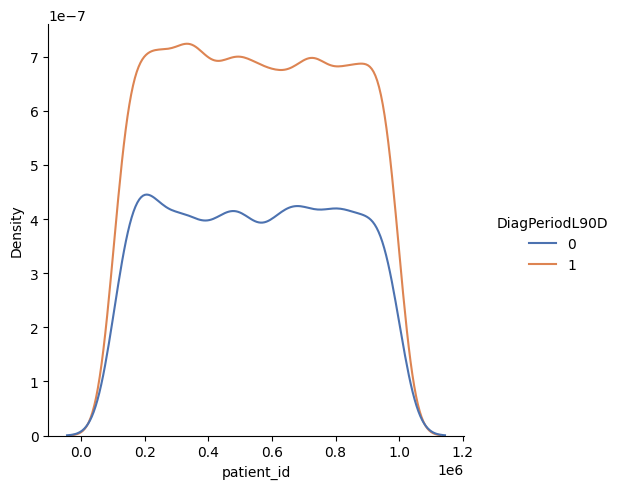

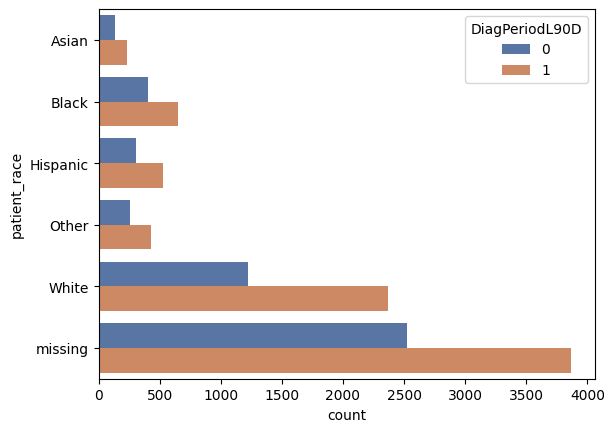

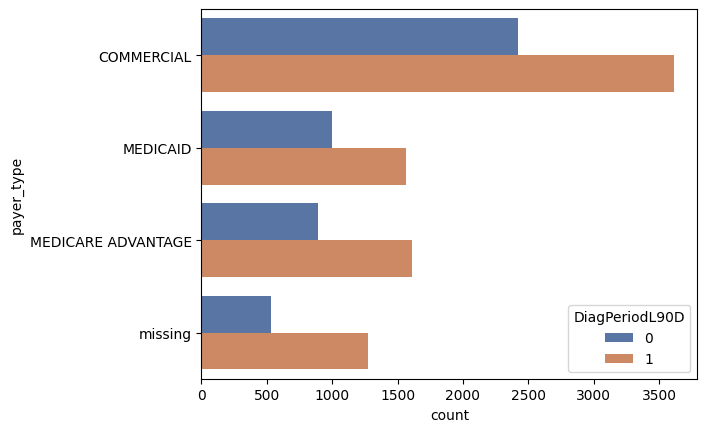

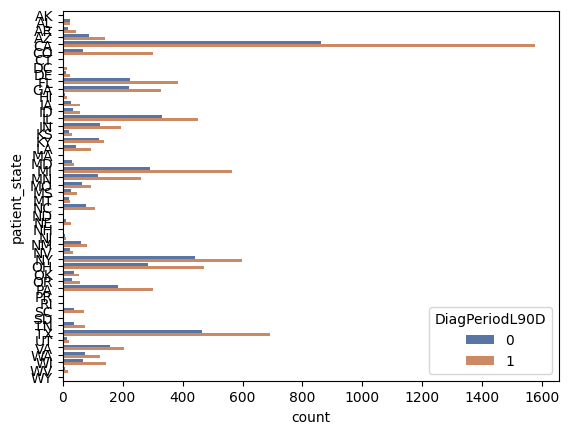

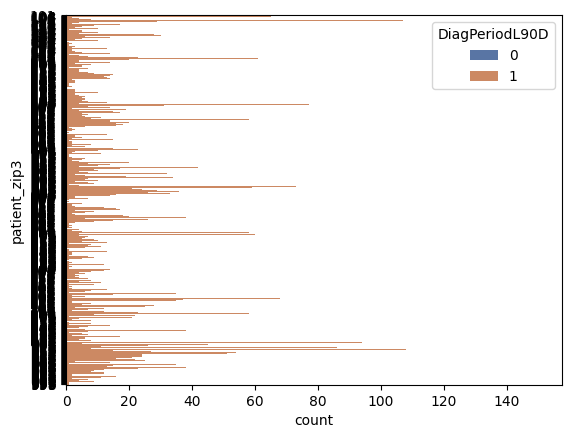

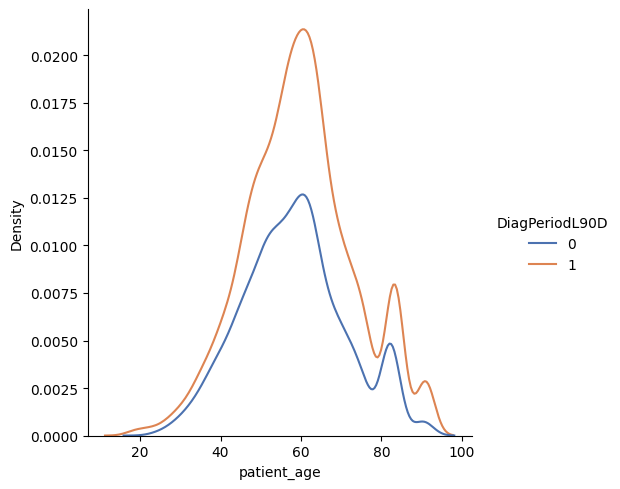

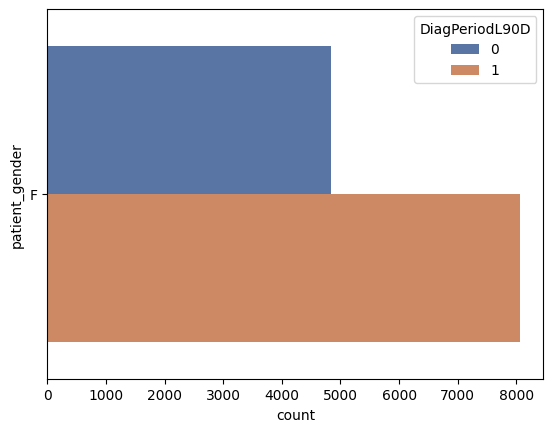

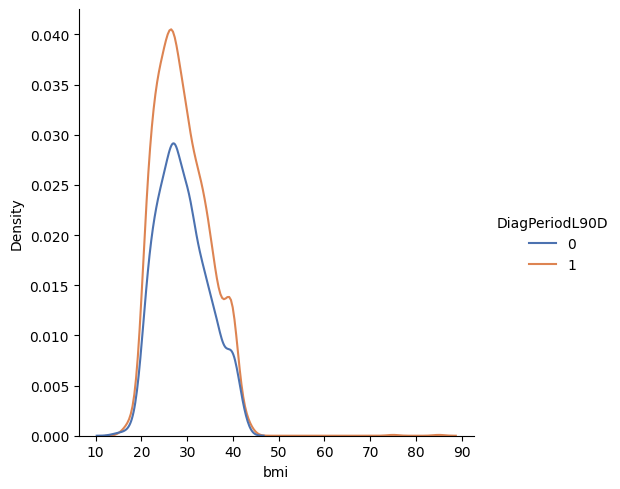

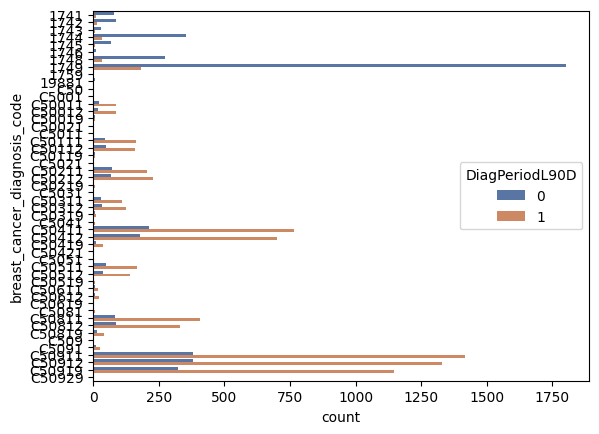

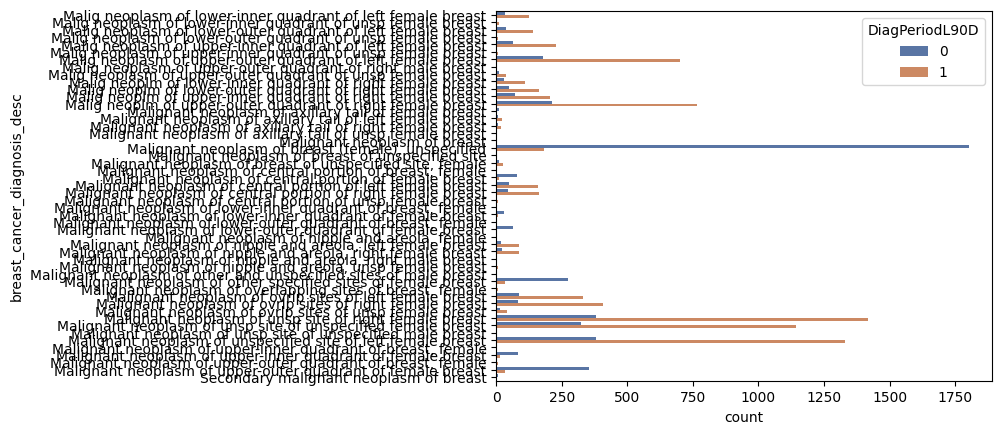

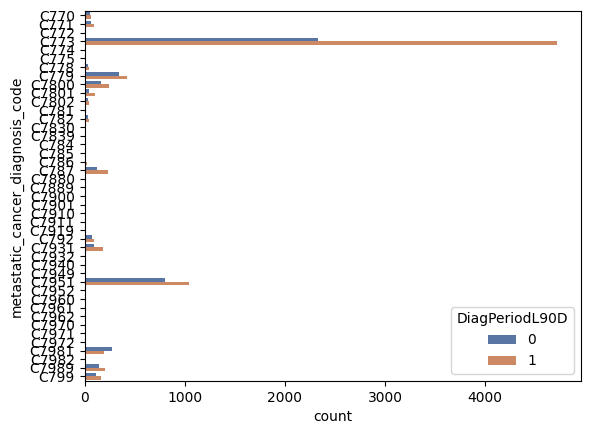

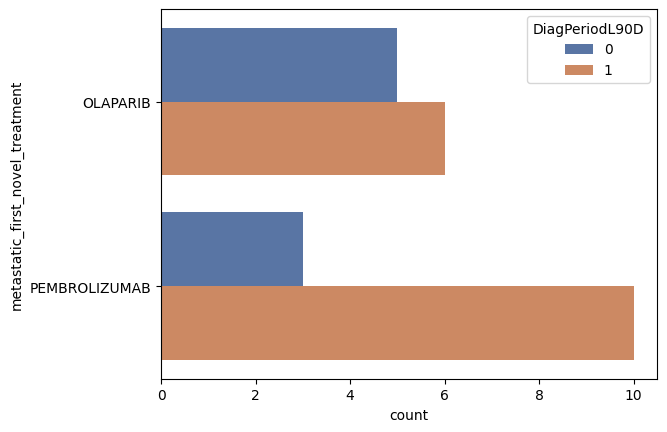

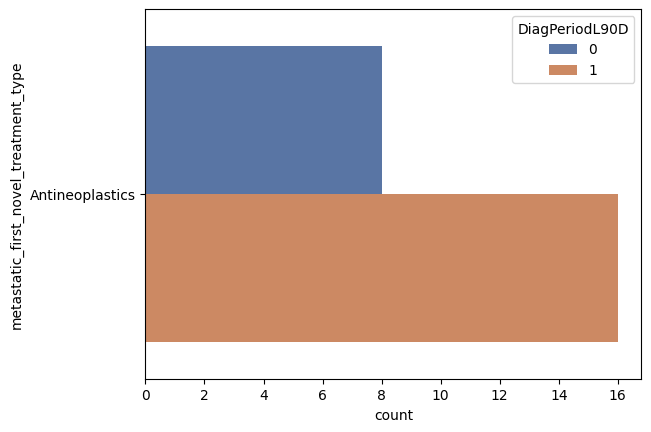

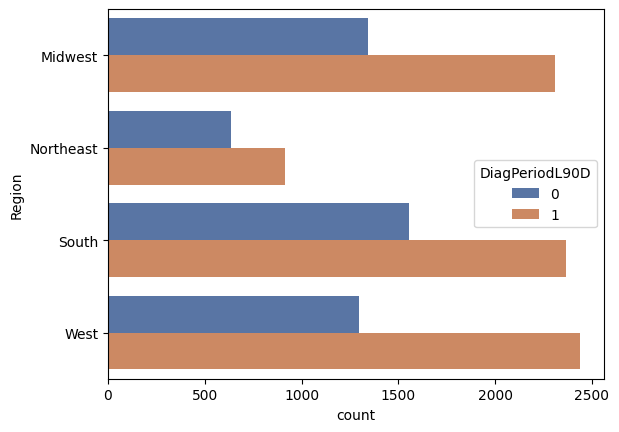

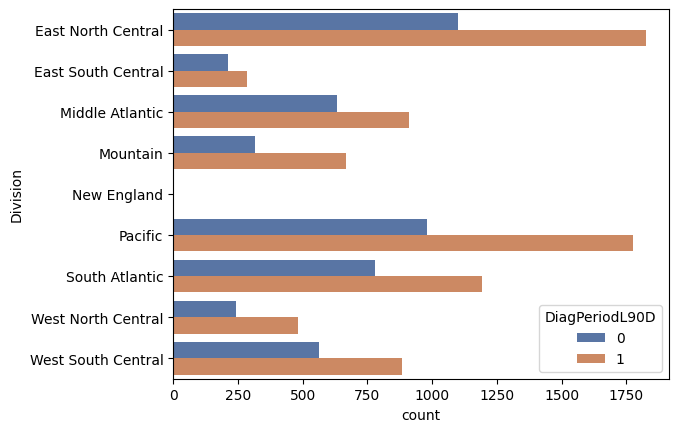

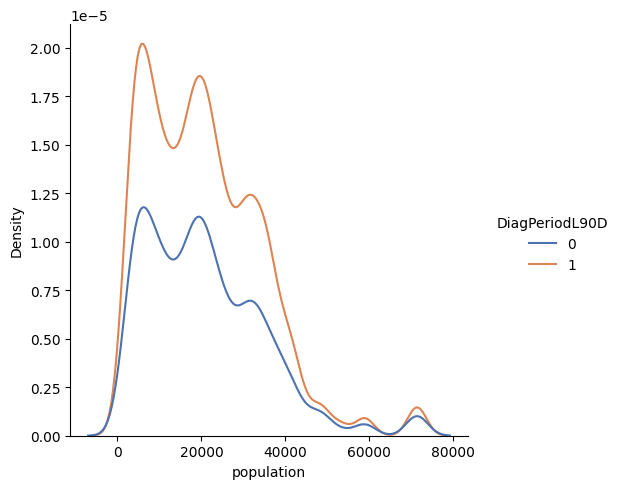

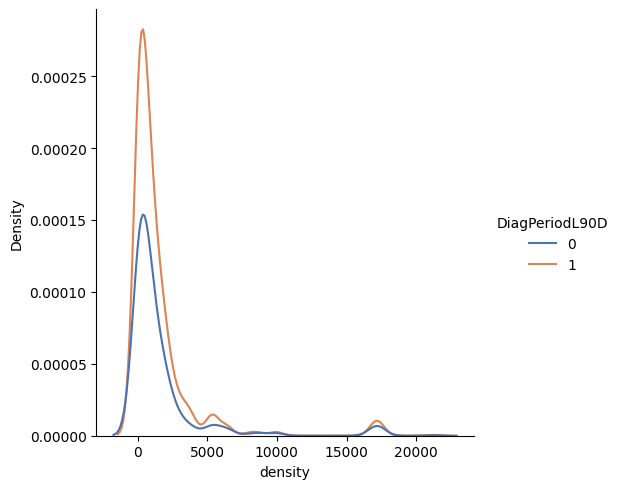

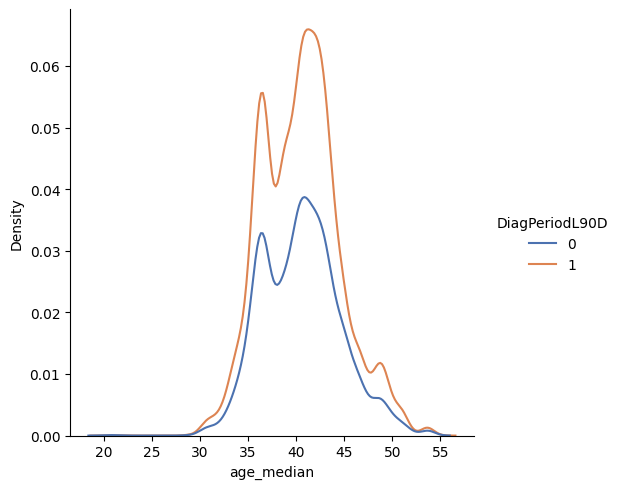

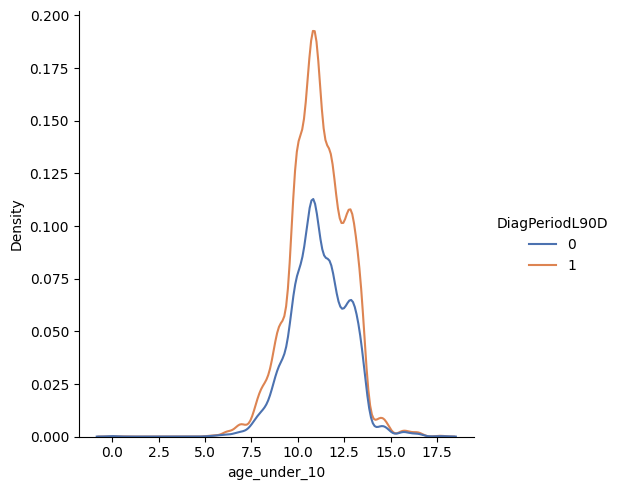

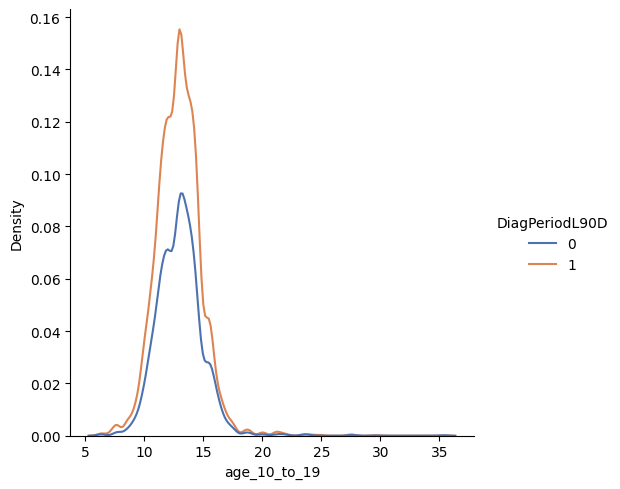

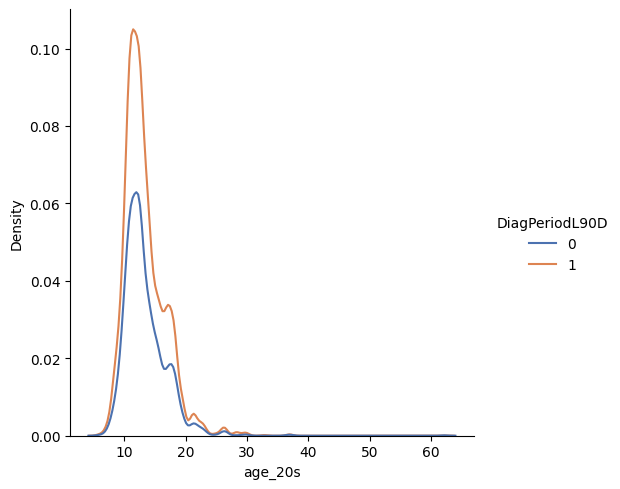

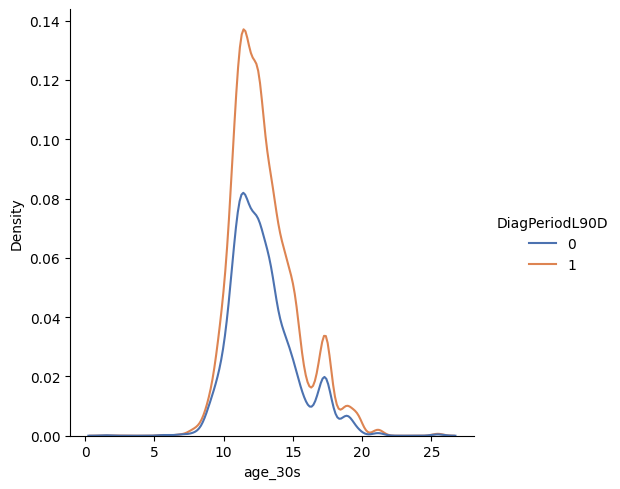

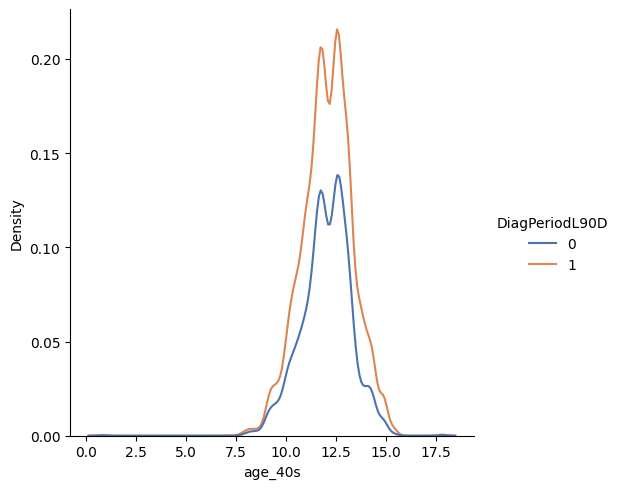

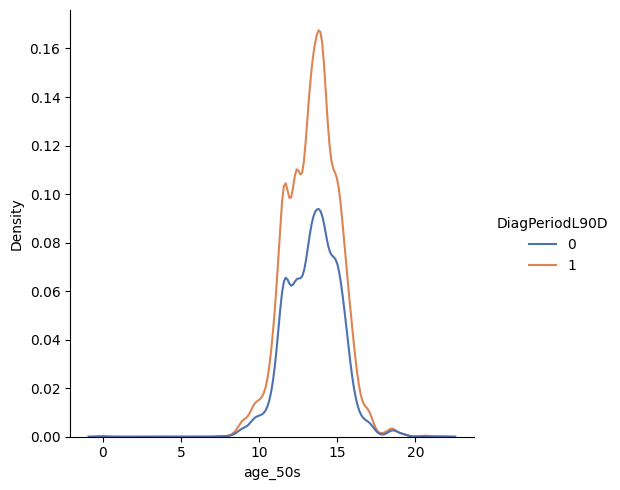

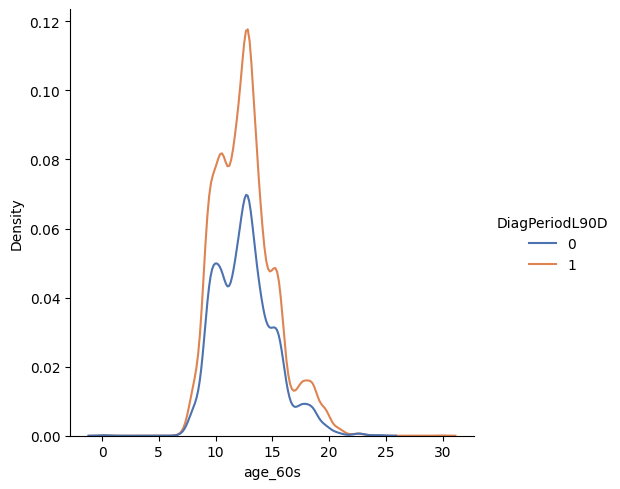

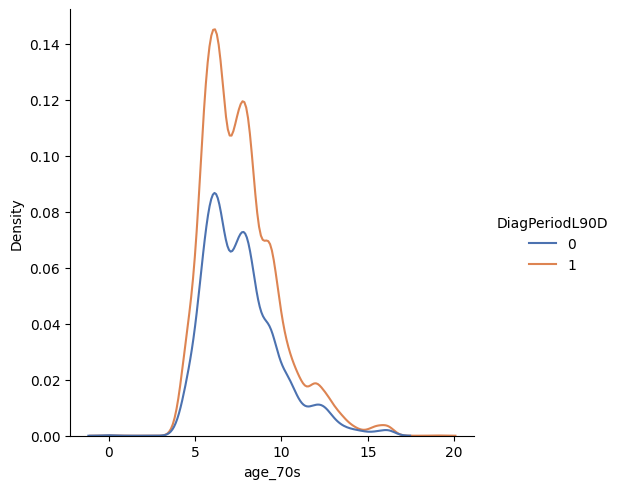

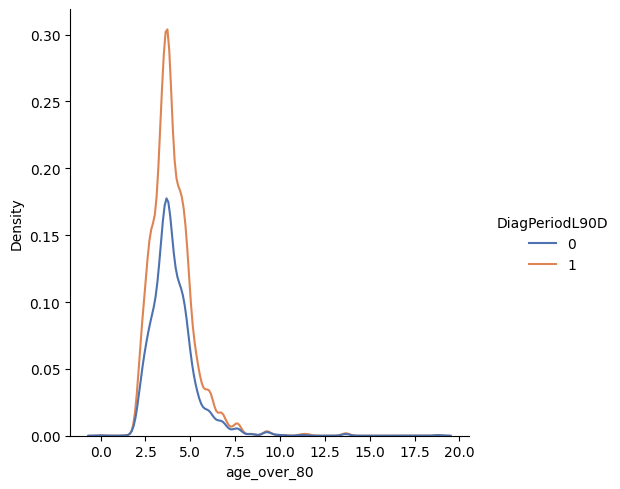

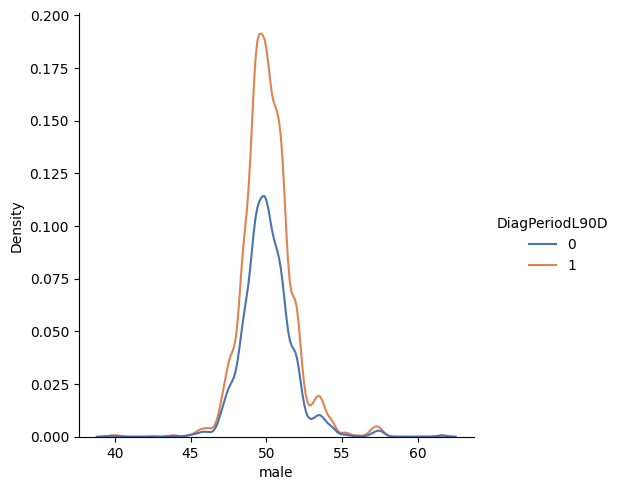

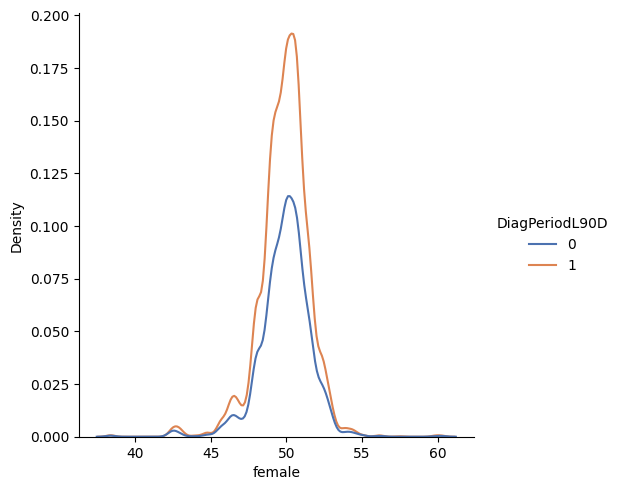

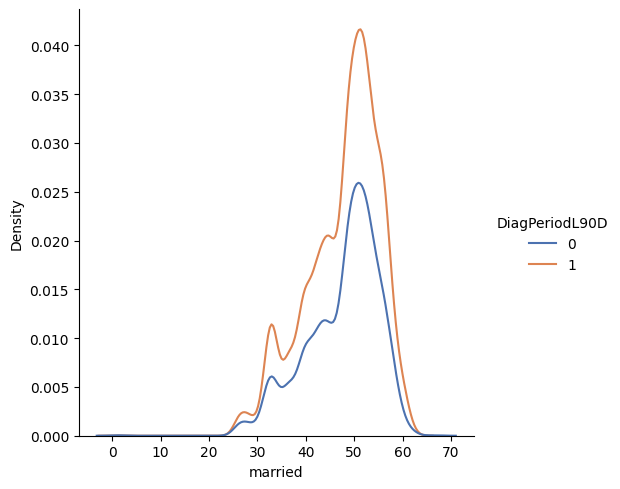

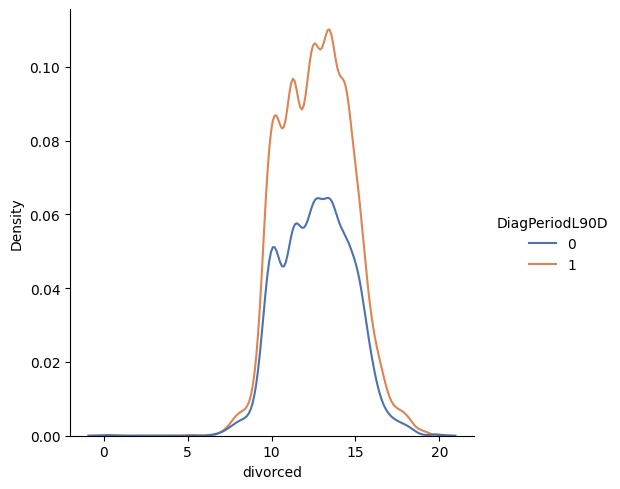

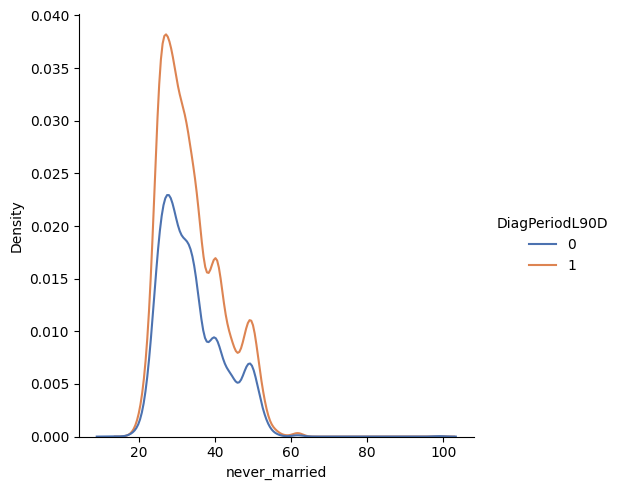

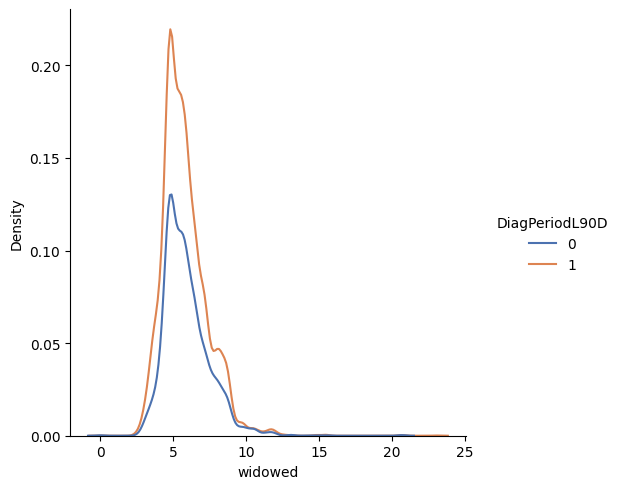

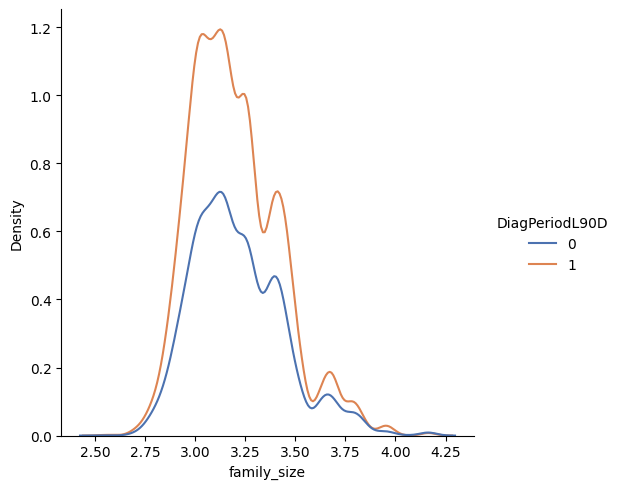

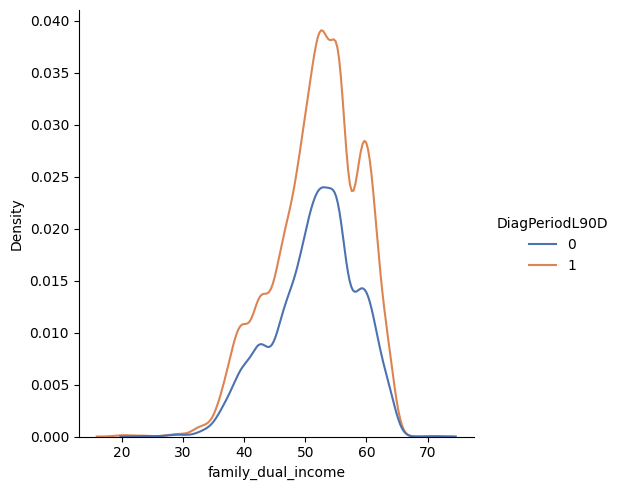

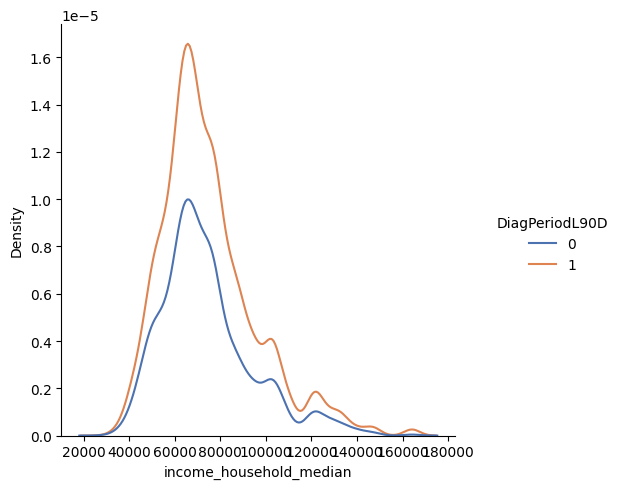

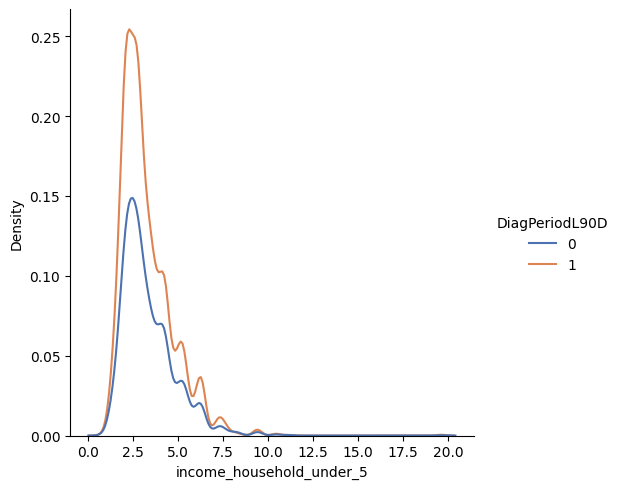

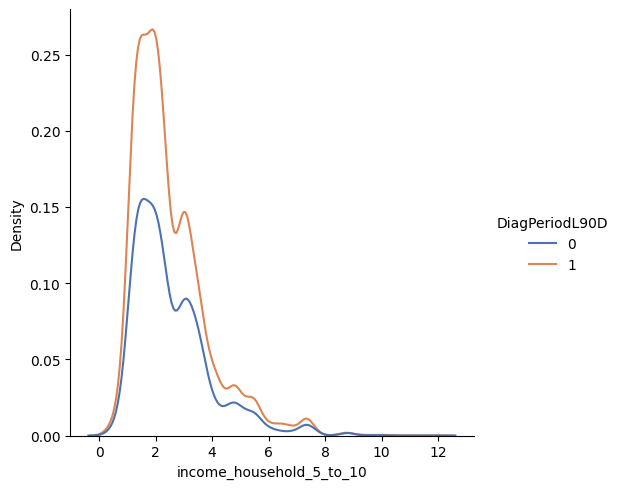

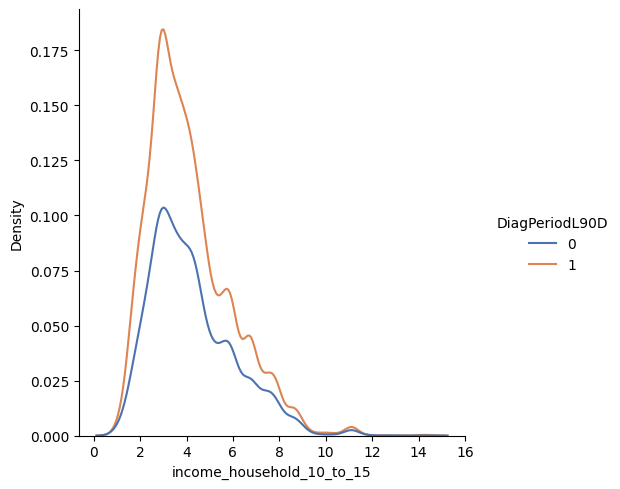

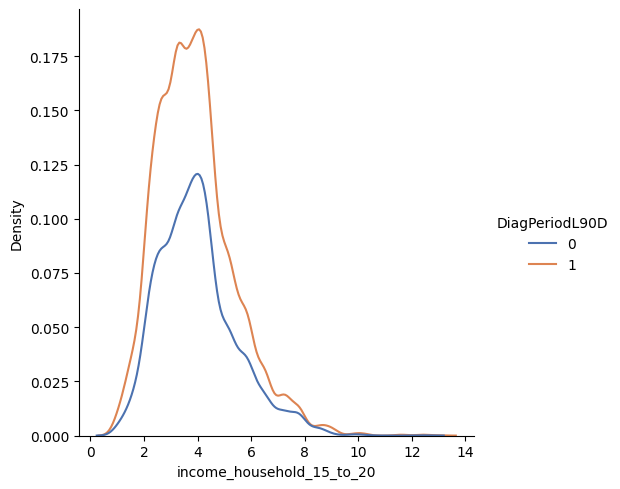

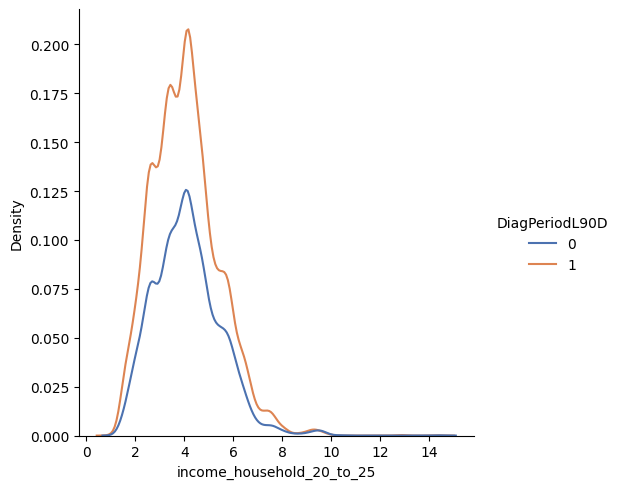

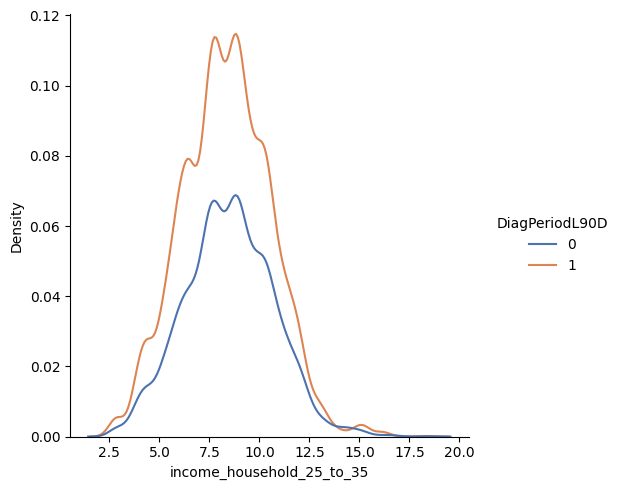

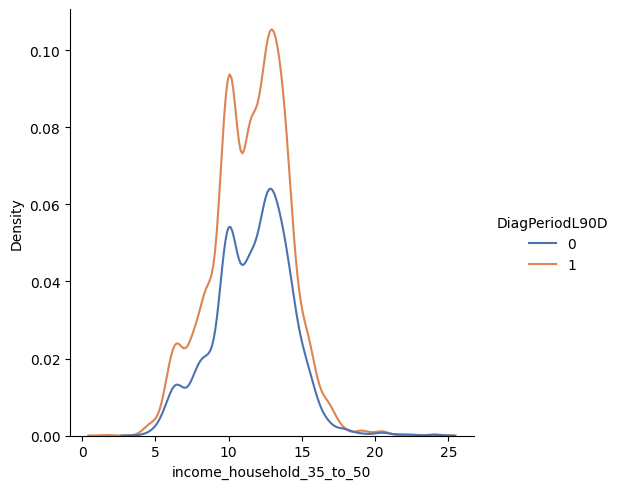

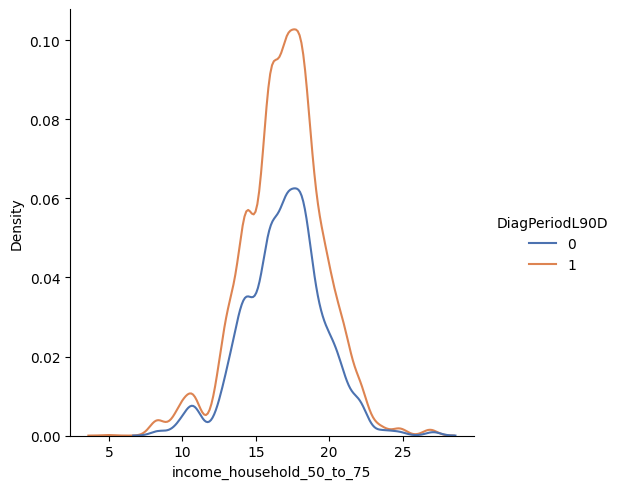

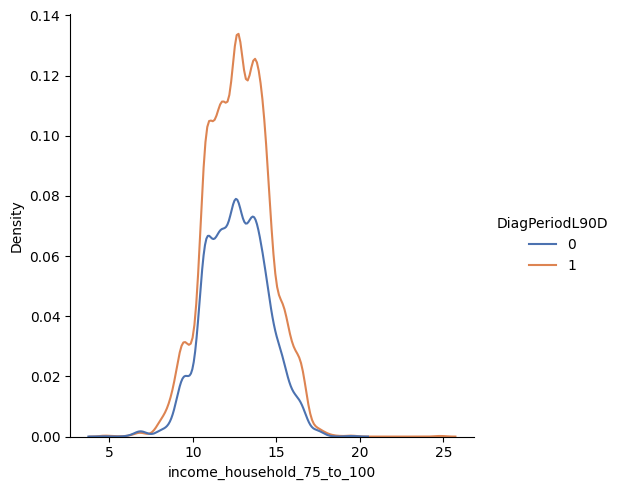

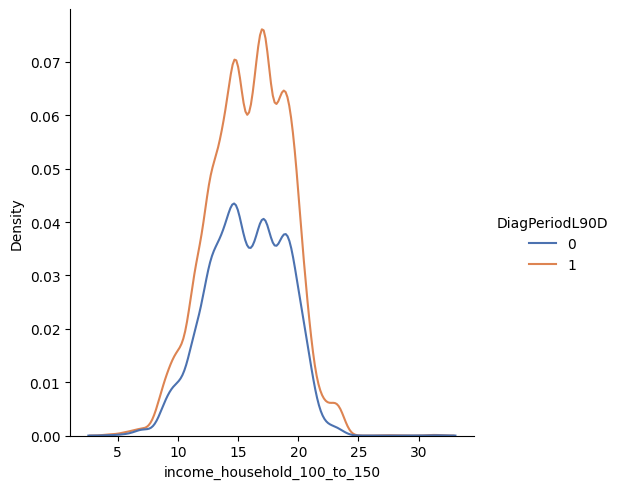

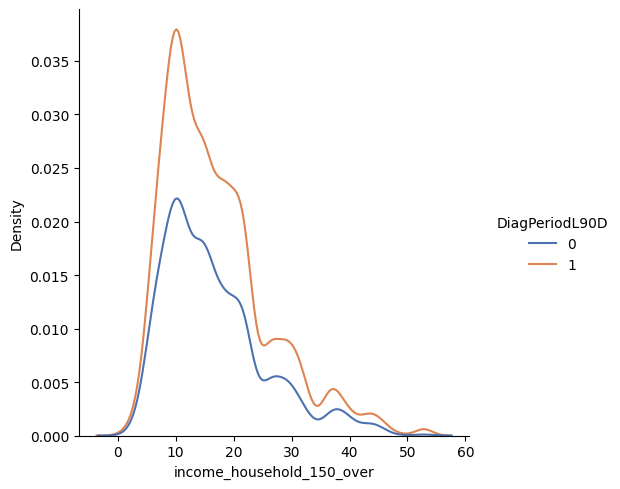

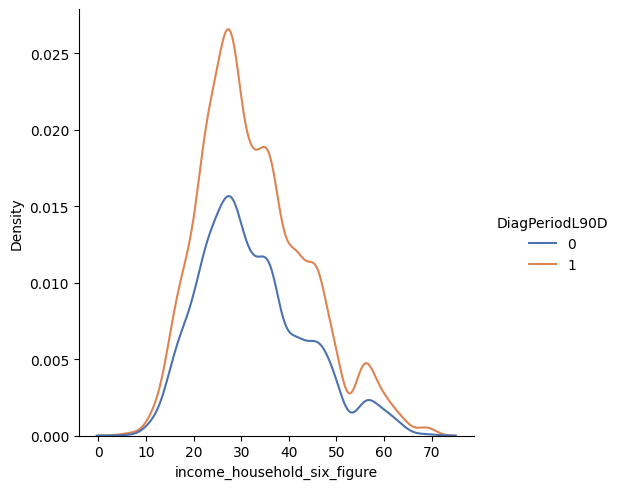

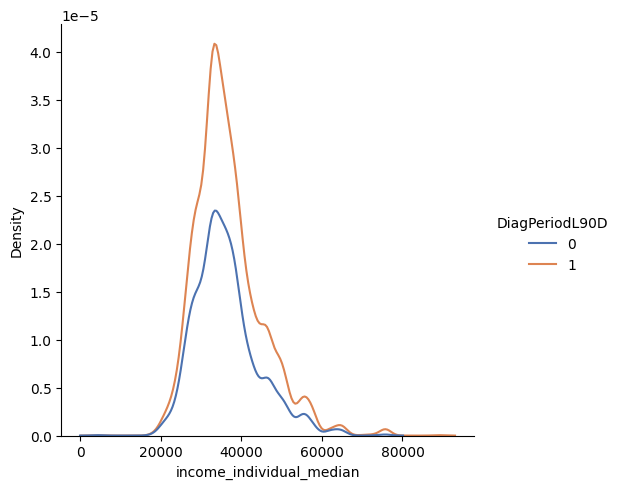

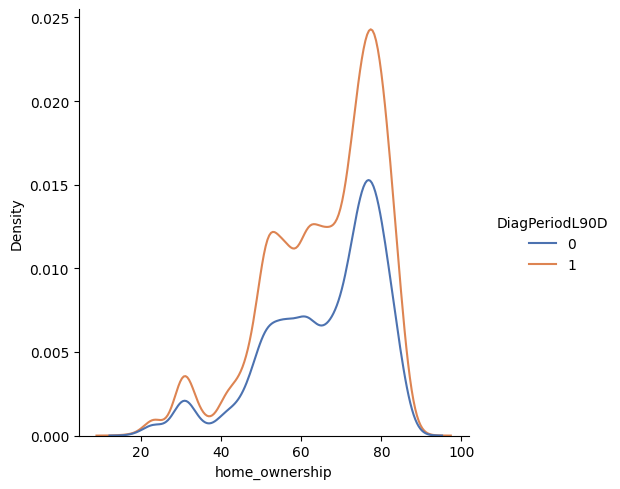

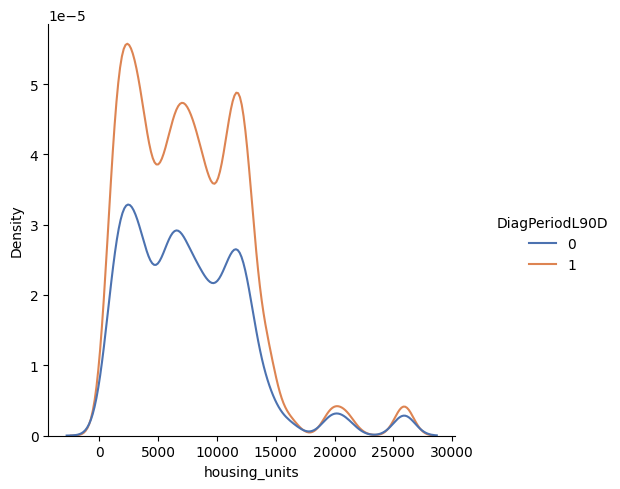

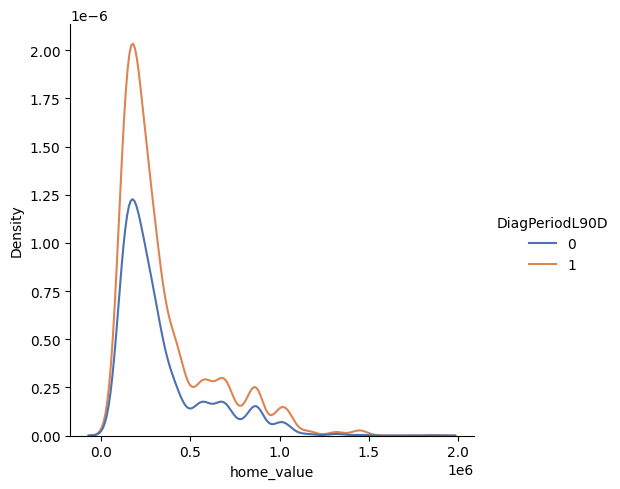

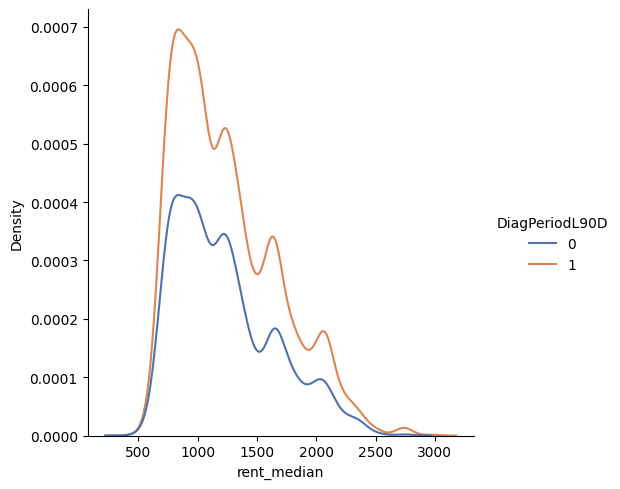

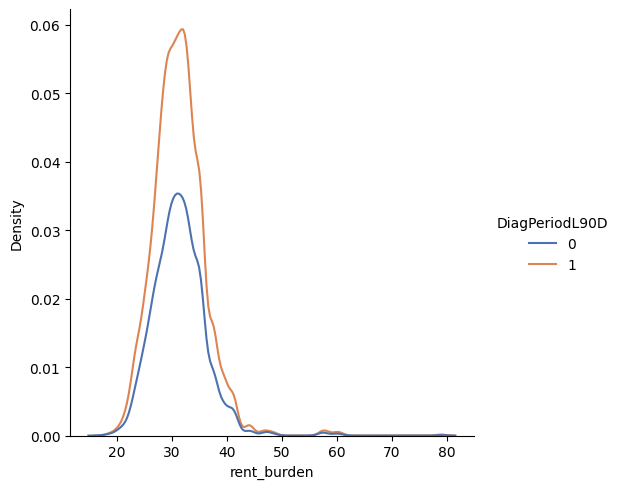

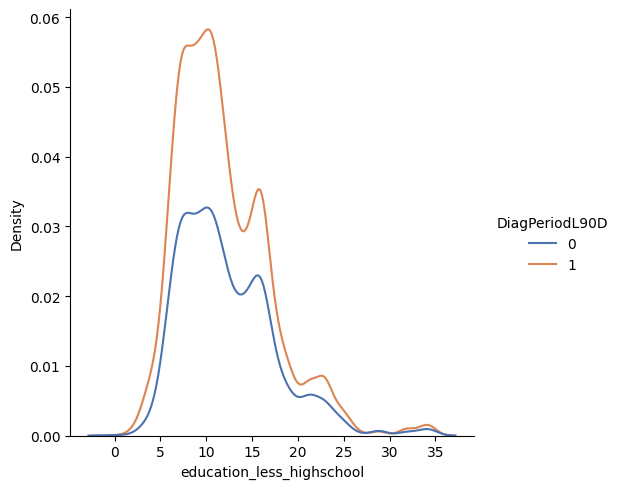

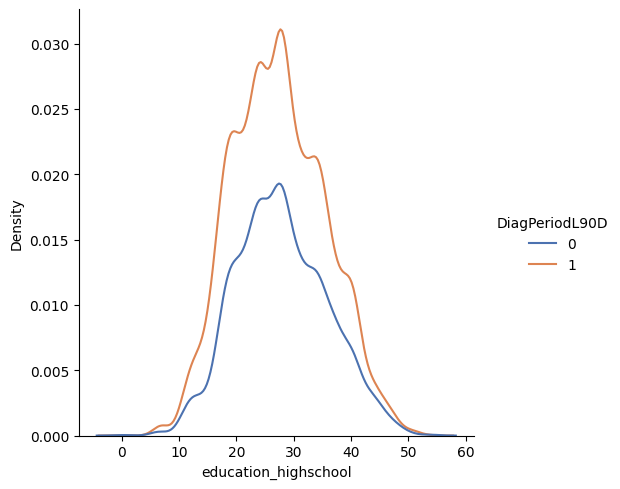

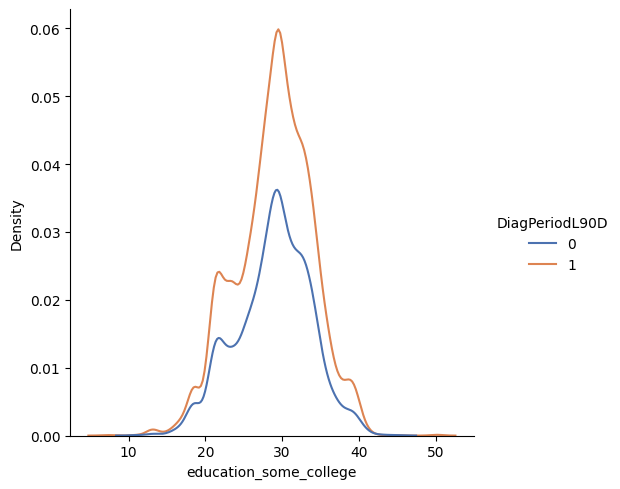

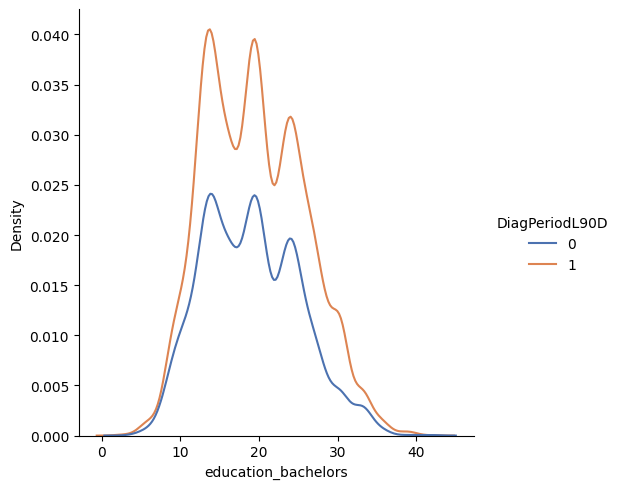

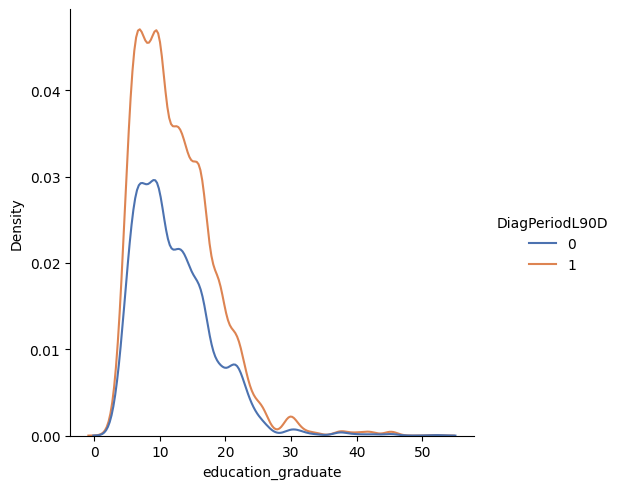

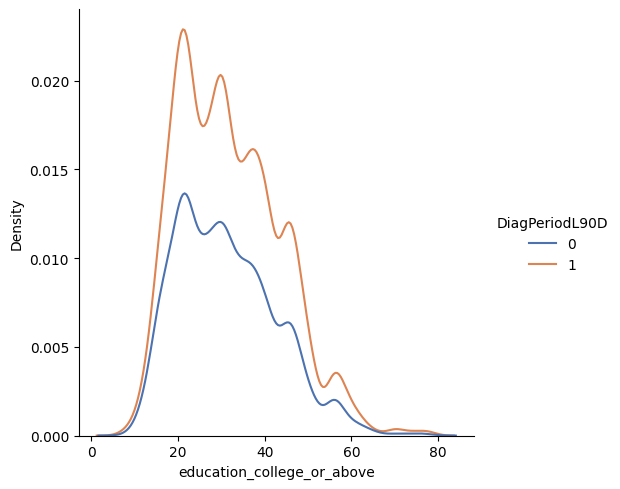

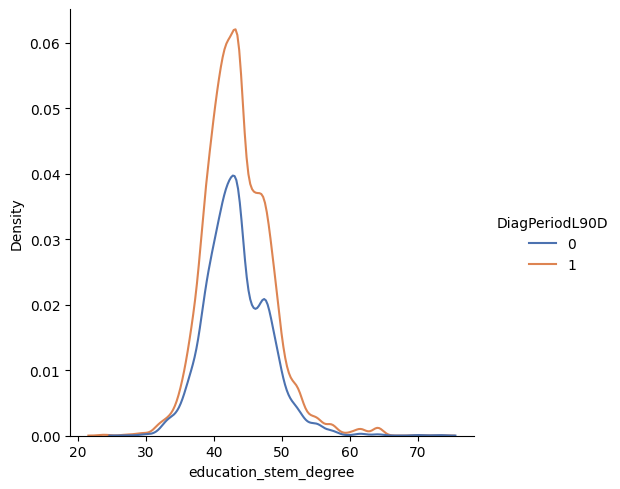

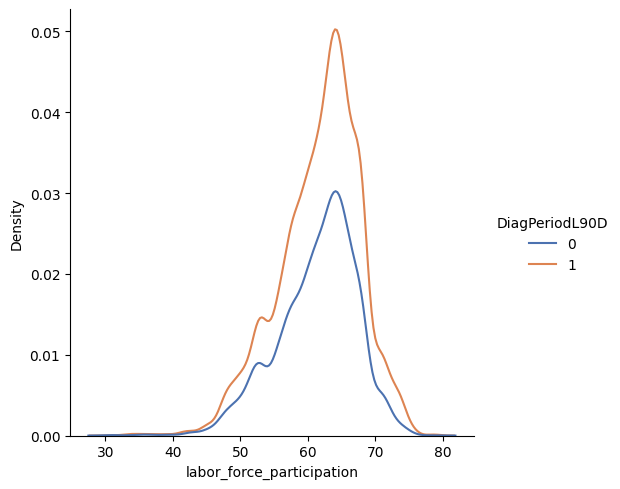

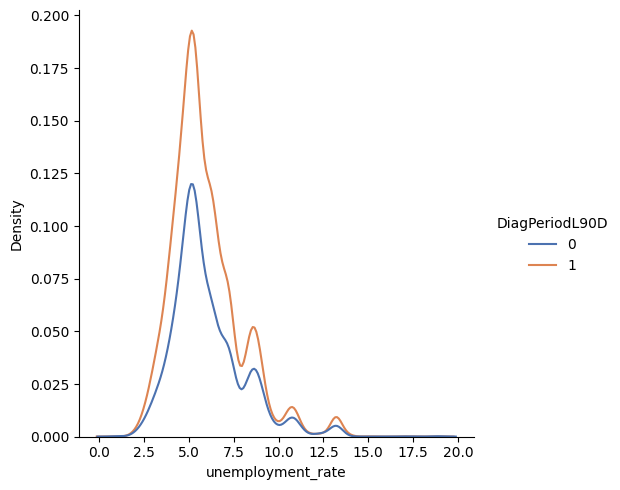

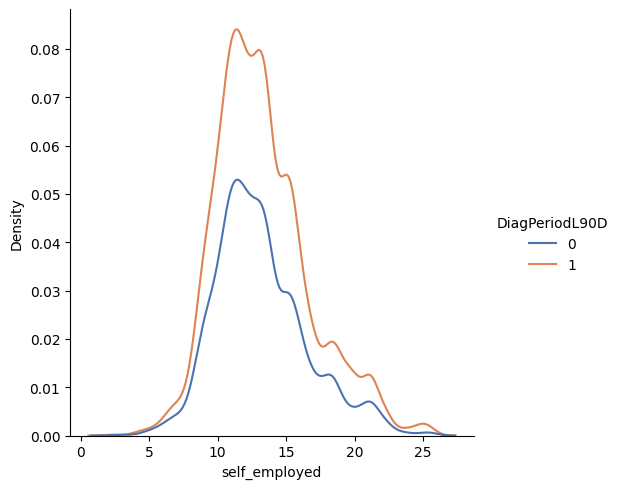

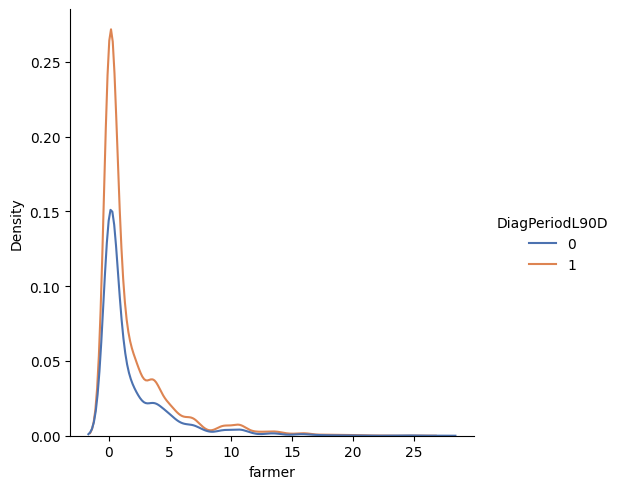

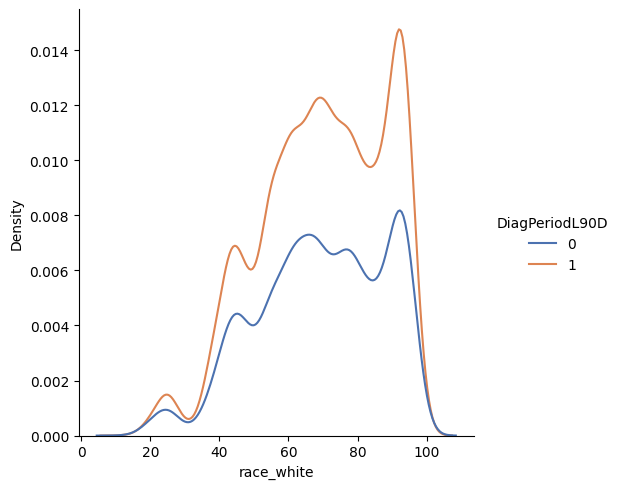

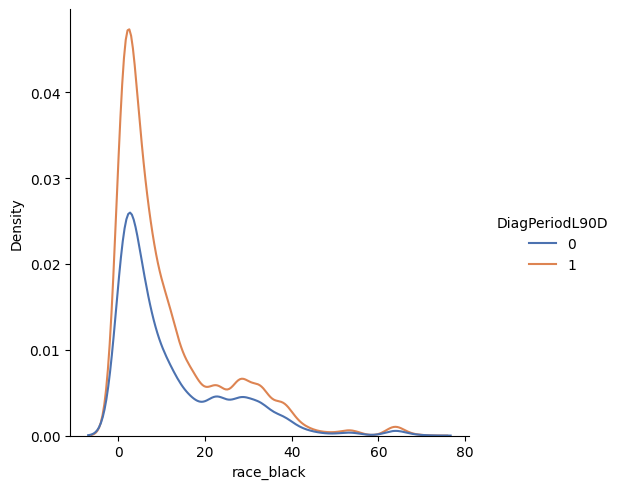

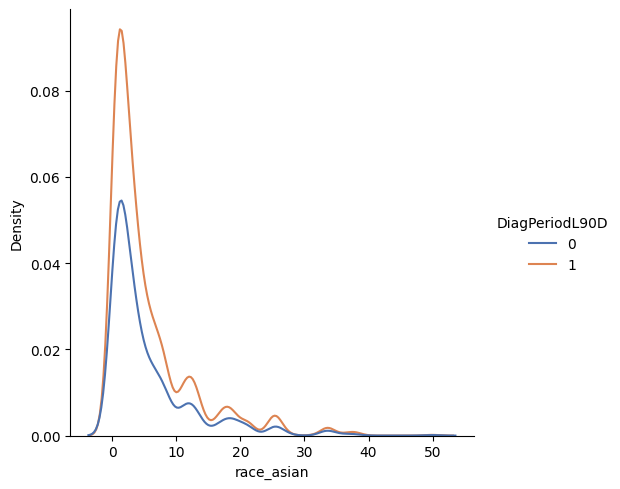

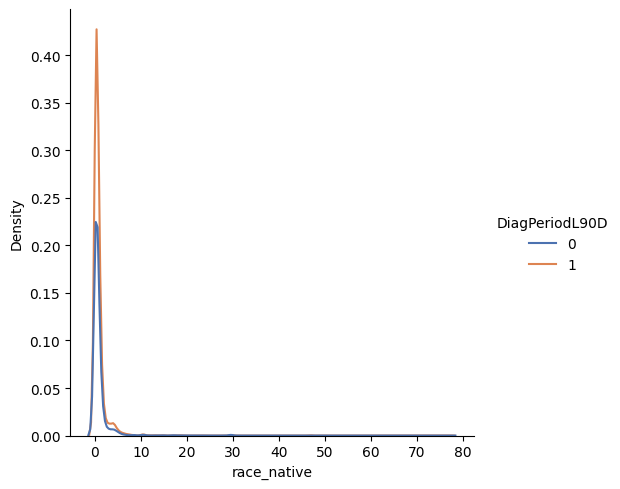

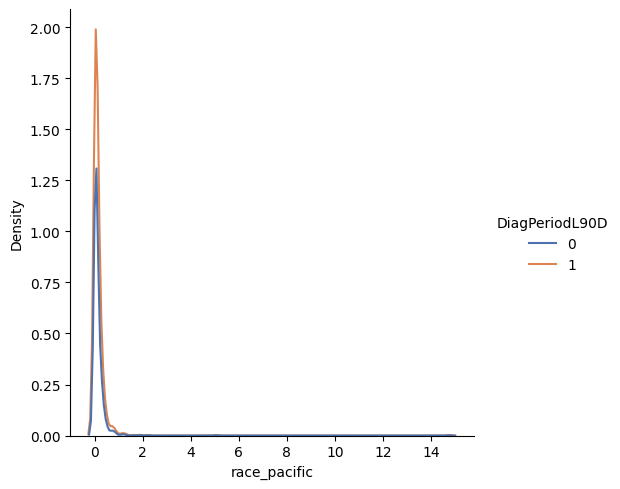

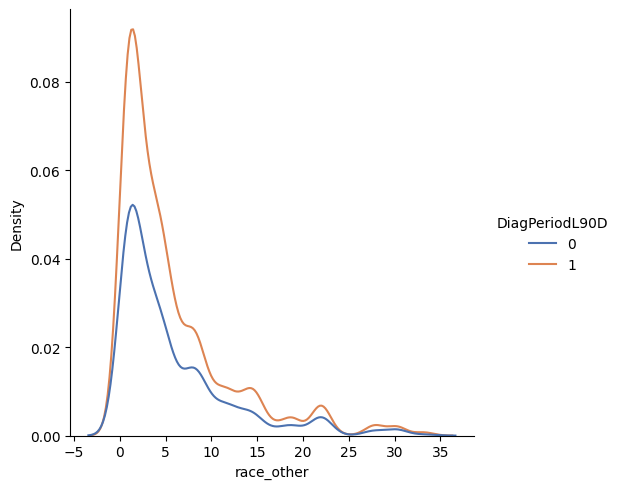

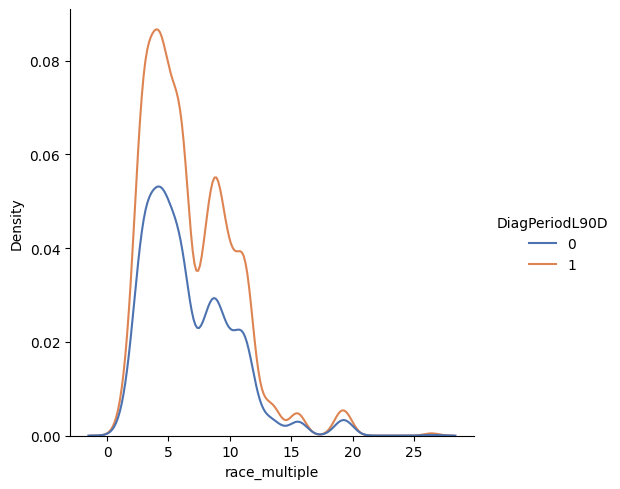

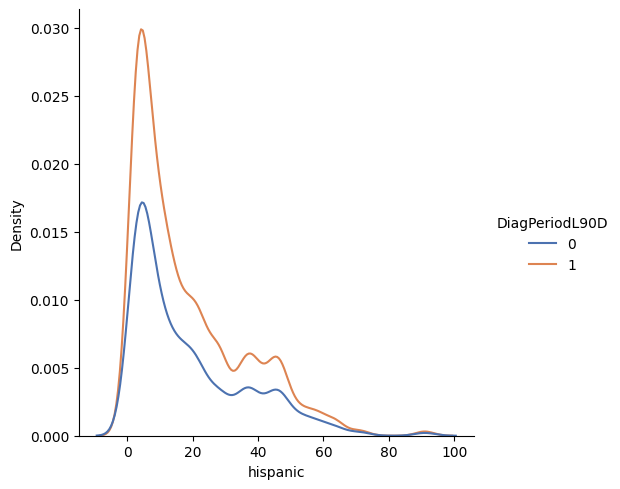

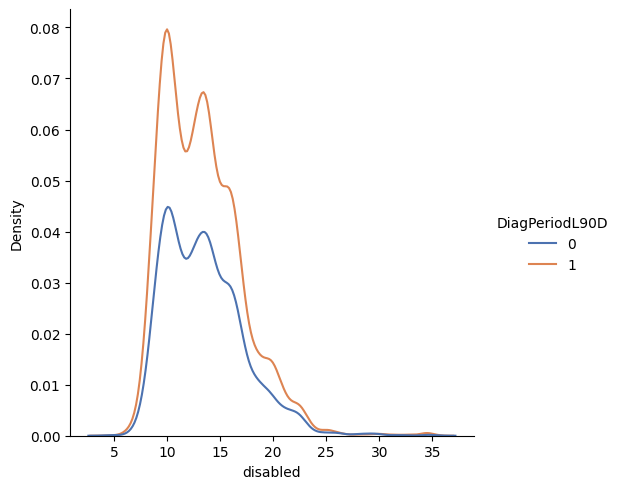

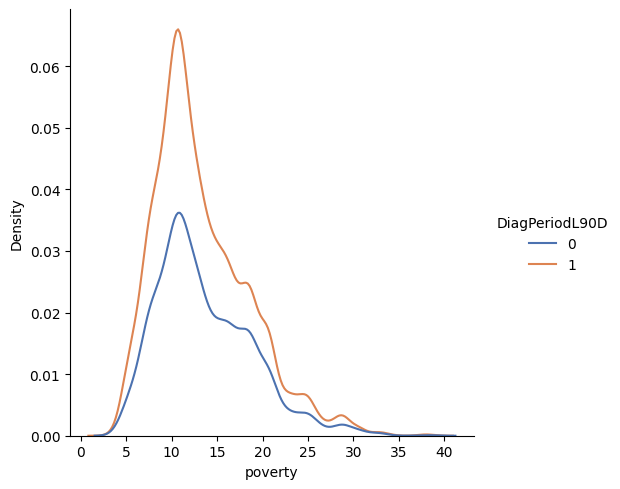

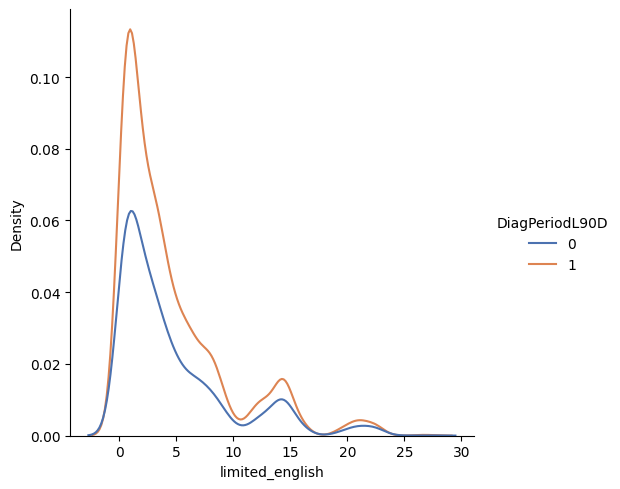

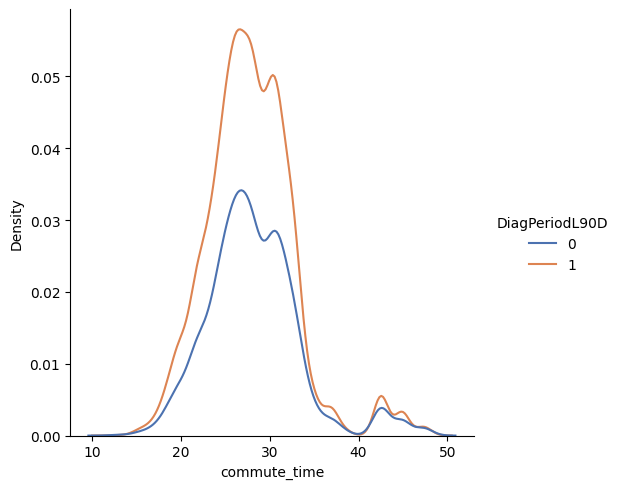

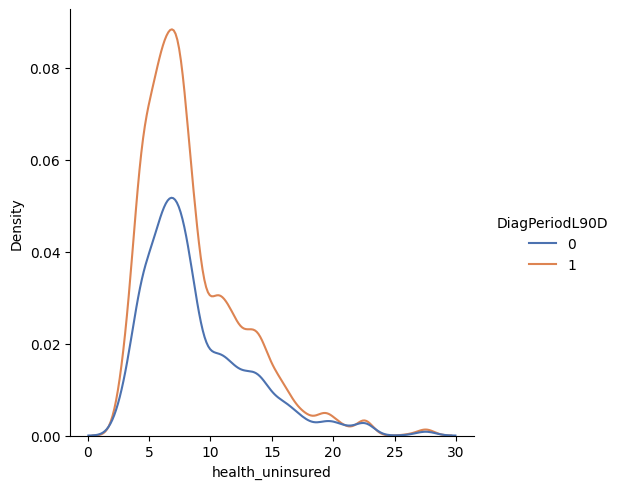

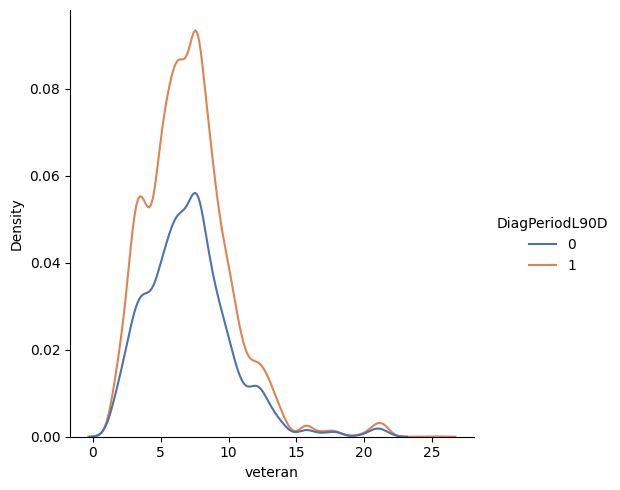

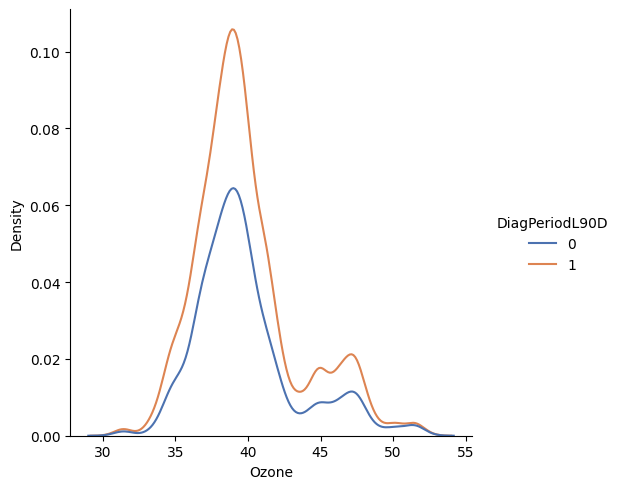

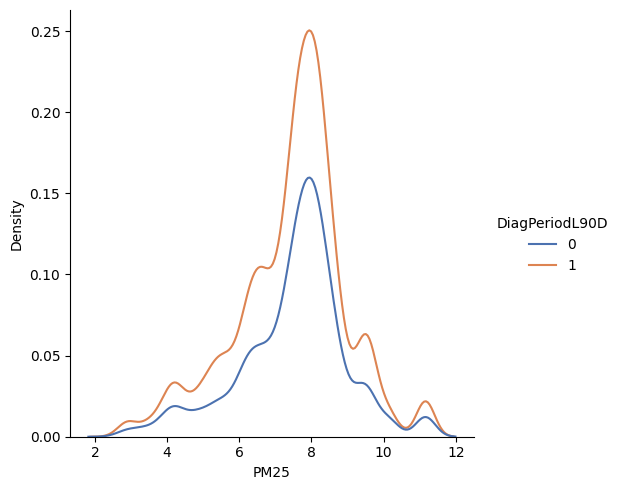

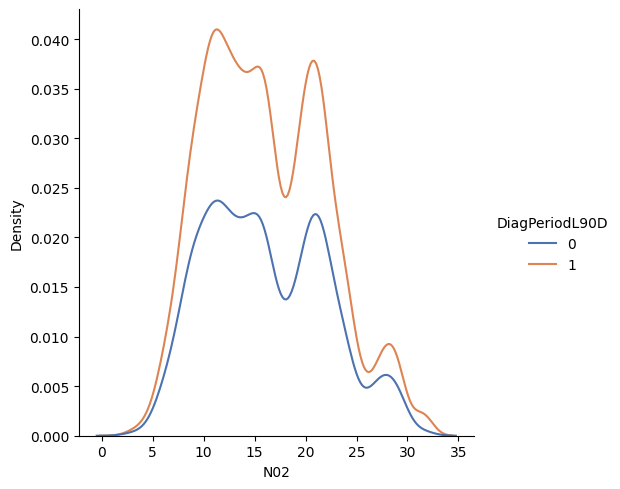

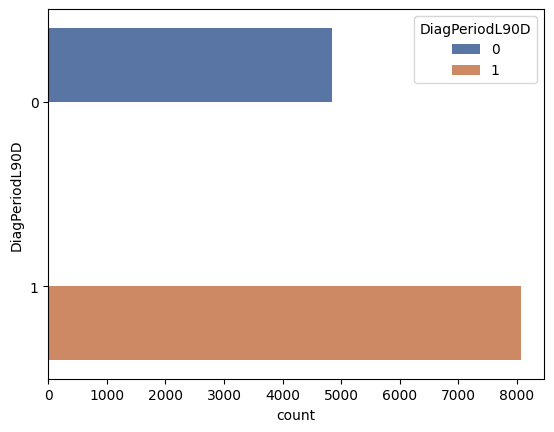

In [22]:
for col in train.columns:
    if train[col].dtypes in ['float64' , 'int64']:
        sns.displot(train, x=col, hue='DiagPeriodL90D', kind = 'kde')
        plt.show()
    else:
        sns.countplot(train, y=col, hue='DiagPeriodL90D', orient = 'v' )
        plt.show()

# Patient_zip3 is not readable so let's visualize this column and patient_state with geopandas

In [23]:
zip3_data = train.groupby(['patient_zip3', 'DiagPeriodL90D'])['patient_gender'].count()
state_data = train.groupby(['patient_state', 'DiagPeriodL90D'])['patient_gender'].count()

In [24]:
print(zip3_data)

patient_zip3  DiagPeriodL90D
101           0                  0
              1                  2
103           0                 14
              1                 21
104           0                 48
                                ..
996           1                  1
998           0                  1
              1                  0
999           0                  0
              1                  1
Name: patient_gender, Length: 1478, dtype: int64


In [25]:
print(state_data)

patient_state  DiagPeriodL90D
AK             0                   3
               1                   3
AL             0                  24
               1                  26
AR             0                  19
                                ... 
WI             1                 144
WV             0                   9
               1                  18
WY             0                   3
               1                   1
Name: patient_gender, Length: 100, dtype: int64


# I will use the aggregated data for zip3 and state in order to visualize the data on the map.

In [26]:
state_data = state_data.reset_index()

In [27]:
state_data['patient_count'] = state_data['patient_gender']
state_data.drop(labels ='patient_gender', axis=1, inplace = True)


In [28]:
state_data = state_data.pivot(index='patient_state', columns = 'DiagPeriodL90D', values= 'patient_count' )

In [29]:
type(state_data)

pandas.core.frame.DataFrame

In [30]:
state_data['quick_diagnosis'] = state_data[1] / (state_data[0]+state_data[1])

In [31]:
state_data.reset_index(level= 'patient_state', inplace=True)


In [32]:
state_data.head(50)

DiagPeriodL90D patient_state    0     1  quick_diagnosis
0                         AK    3     3         0.500000
1                         AL   24    26         0.520000
2                         AR   19    44         0.698413
3                         AZ   87   142         0.620087
4                         CA  862  1576         0.646432
5                         CO   68   303         0.816712
6                         CT    1     1         0.500000
7                         DC    6    14         0.700000
8                         DE   10    23         0.696970
9                         FL  223   386         0.633826
10                        GA  222   329         0.597096
11                        HI    8    13         0.619048
12                        IA   27    59         0.686047
13                        ID   35    58         0.623656
14                        IL  331   451         0.576726
15                        IN  123   194         0.611987
16                        KS   20    30         0.600000
17                        KY  121   138         0.532819
18                        LA   45    94         0.676259
19                        MA    0     1         1.000000
20                        MD   32    39         0.549296
21                        MI  293   565         0.658508
22                        MN  117   260         0.689655
23                        MO   64    96         0.600000
24                        MS   28    48         0.631579
25                        MT   21    24         0.533333
26                        NC   78   108         0.580645
27                        ND    1     5         0.833333
28                        NE   12    28         0.700000
29                        NH    1     0         0.000000
30                        NJ    9    12         0.571429
31                        NM   60    81         0.574468
32                        NV   26    36         0.580645
33                        NY  442   599         0.575408
34                        OH  284   470         0.623342
35                        OK   37    56         0.602151
36                        OR   32    57         0.640449
37                        PA  183   300         0.621118
38                        PR    1     0         0.000000
39                        RI    0     1         1.000000
40                        SC   39    71         0.645455
41                        SD    3     5         0.625000
42                        TN   38    74         0.660714
43                        TX  464   691         0.598268
44                        UT   15    21         0.583333
45                        VA  159   206         0.564384
46                        WA   75   125         0.625000
47                        WI   68   144         0.679245
48                        WV    9    18         0.666667
49                        WY    3     1         0.250000

In [33]:
state_data.shape

(50, 4)

In [34]:
state_data.describe()

DiagPeriodL90D           0            1  quick_diagnosis
count            50.000000    50.000000        50.000000
mean             96.580000   160.520000         0.606390
std             157.480817   267.620676         0.168705
min               0.000000     0.000000         0.000000
25%               9.250000    18.750000         0.575738
50%              33.500000    57.500000         0.620603
75%             109.500000   181.500000         0.665179
max             862.000000  1576.000000         1.000000

In [35]:
geo_states = pd.merge(shape, state_data, how='left', left_on= 'STUSPS', right_on = 'patient_state') 

In [36]:
geo_states.shape

(56, 14)

In [37]:
geo_states.head(56)

STATEFP   STATENS     AFFGEOID GEOID STUSPS  \
0       28  01779790  0400000US28    28     MS   
1       37  01027616  0400000US37    37     NC   
2       40  01102857  0400000US40    40     OK   
3       51  01779803  0400000US51    51     VA   
4       54  01779805  0400000US54    54     WV   
5       22  01629543  0400000US22    22     LA   
6       26  01779789  0400000US26    26     MI   
7       25  00606926  0400000US25    25     MA   
8       16  01779783  0400000US16    16     ID   
9       12  00294478  0400000US12    12     FL   
10      31  01779792  0400000US31    31     NE   
11      53  01779804  0400000US53    53     WA   
12      35  00897535  0400000US35    35     NM   
13      72  01779808  0400000US72    72     PR   
14      46  01785534  0400000US46    46     SD   
15      48  01779801  0400000US48    48     TX   
16      06  01779778  0400000US06    06     CA   
17      01  01779775  0400000US01    01     AL   
18      13  01705317  0400000US13    13     GA   
19      42  01779798  0400000US42    42     PA   
20      29  01779791  0400000US29    29     MO   
21      08  01779779  0400000US08    08     CO   
22      49  01455989  0400000US49    49     UT   
23      47  01325873  0400000US47    47     TN   
24      56  01779807  0400000US56    56     WY   
25      36  01779796  0400000US36    36     NY   
26      20  00481813  0400000US20    20     KS   
27      02  01785533  0400000US02    02     AK   
28      32  01779793  0400000US32    32     NV   
29      17  01779784  0400000US17    17     IL   
30      50  01779802  0400000US50    50     VT   
31      30  00767982  0400000US30    30     MT   
32      19  01779785  0400000US19    19     IA   
33      45  01779799  0400000US45    45     SC   
34      33  01779794  0400000US33    33     NH   
35      04  01779777  0400000US04    04     AZ   
36      11  01702382  0400000US11    11     DC   
37      60  01802701  0400000US60    60     AS   
38      78  01802710  0400000US78    78     VI   
39      34  01779795  0400000US34    34     NJ   
40      24  01714934  0400000US24    24     MD   
41      23  01779787  0400000US23    23     ME   
42      15  01779782  0400000US15    15     HI   
43      10  01779781  0400000US10    10     DE   
44      66  01802705  0400000US66    66     GU   
45      69  01779809  0400000US69    69     MP   
46      44  01219835  0400000US44    44     RI   
47      21  01779786  0400000US21    21     KY   
48      39  01085497  0400000US39    39     OH   
49      55  01779806  0400000US55    55     WI   
50      41  01155107  0400000US41    41     OR   
51      38  01779797  0400000US38    38     ND   
52      05  00068085  0400000US05    05     AR   
53      18  00448508  0400000US18    18     IN   
54      27  00662849  0400000US27    27     MN   
55      09  01779780  0400000US09    09     CT   

                                            NAME LSAD          ALAND  \
0                                    Mississippi   00   121533519481   
1                                 North Carolina   00   125923656064   
2                                       Oklahoma   00   177662925723   
3                                       Virginia   00   102257717110   
4                                  West Virginia   00    62266474513   
5                                      Louisiana   00   111897594374   
6                                       Michigan   00   146600952990   
7                                  Massachusetts   00    20205125364   
8                                          Idaho   00   214049787659   
9                                        Florida   00   138949136250   
10                                      Nebraska   00   198956658395   
11                                    Washington   00   172112588220   
12                                    New Mexico   00   314196306401   
13                                   Puerto Rico   00     8868896030   
14                                  South Dakota   00   196346981786   


(20.0, 80.0)

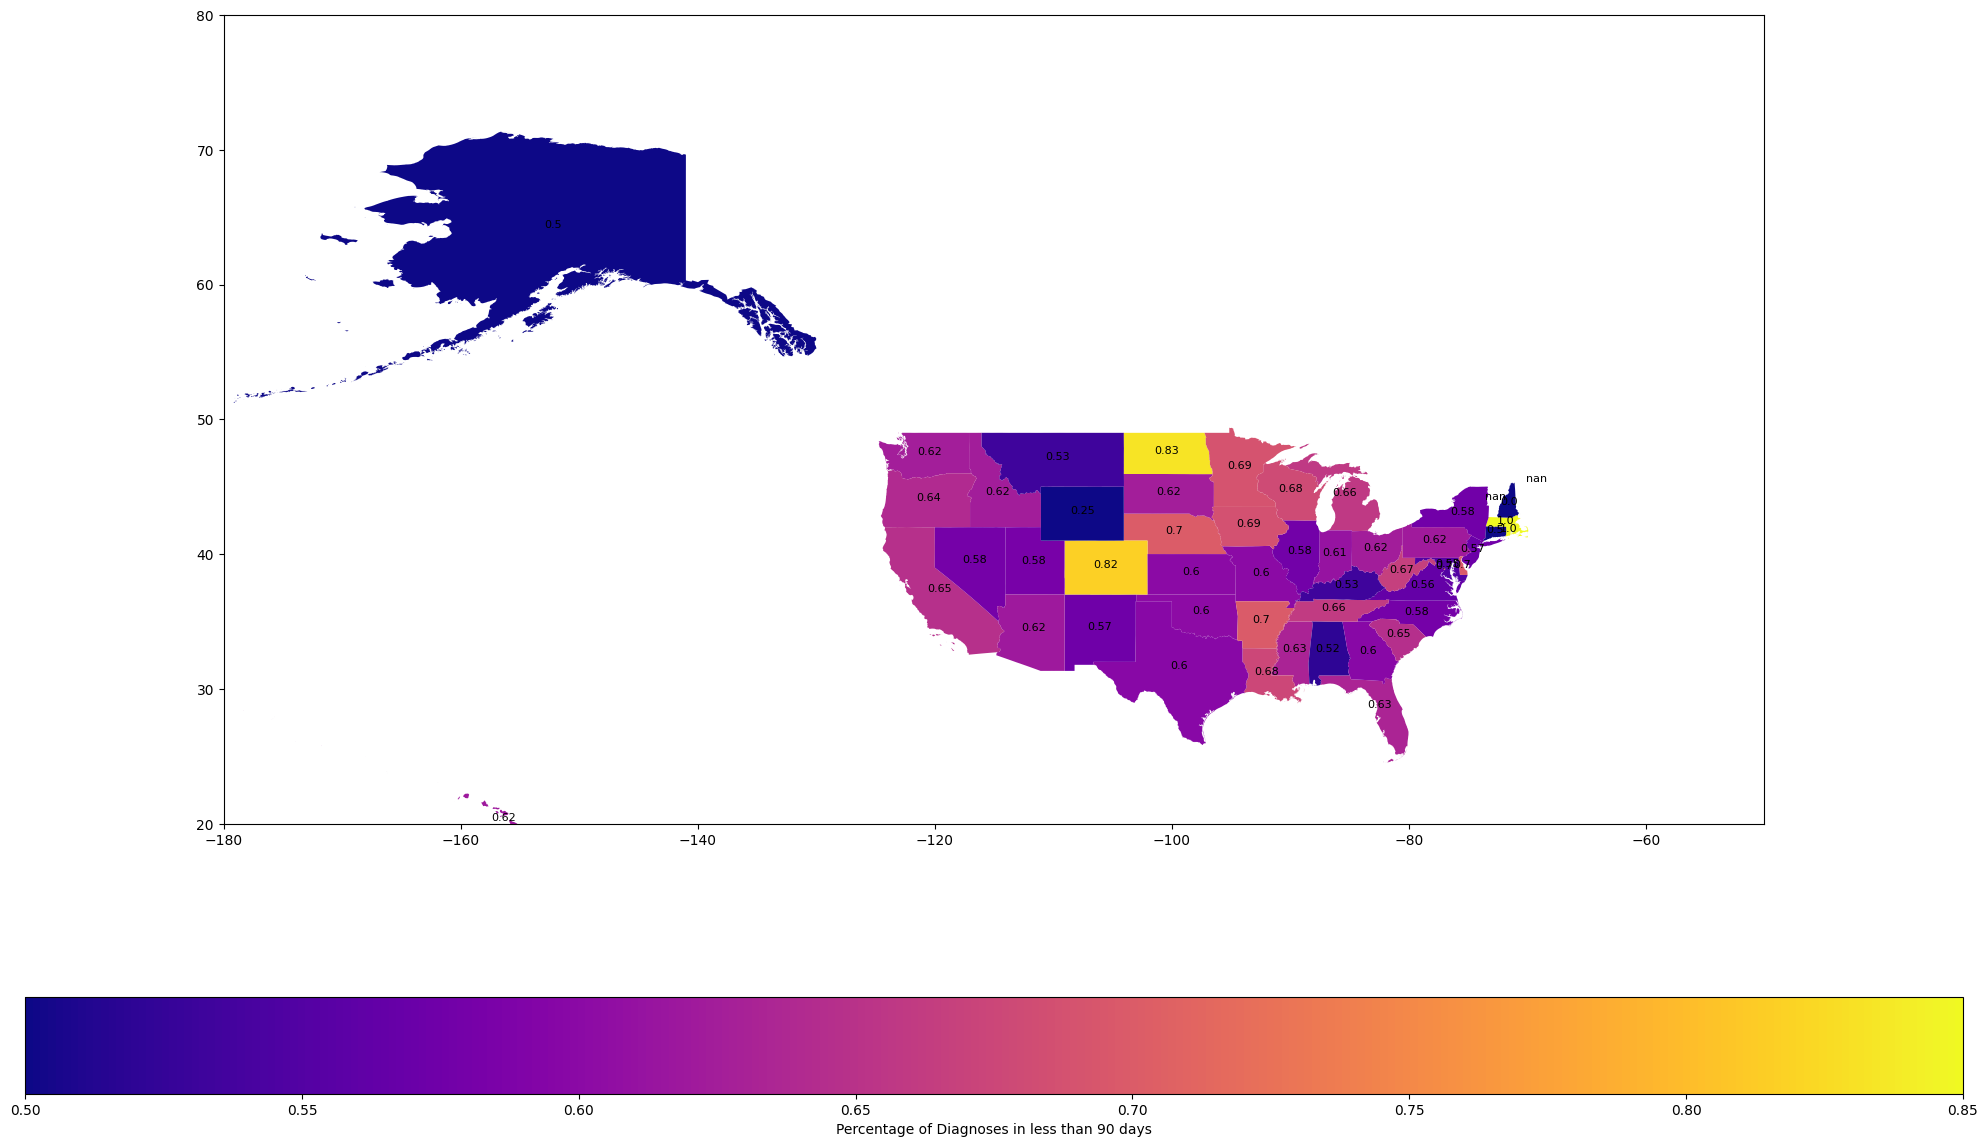

In [38]:
fig = plt.figure(1, figsize=(25, 15))
ax = fig.add_subplot()
geo_states.apply(lambda x: ax.annotate(text=round(x.quick_diagnosis, 2), xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1);
geo_states.plot(ax = ax,column = 'quick_diagnosis', legend=True, cmap='plasma',vmin = 0.5, vmax = 0.85, legend_kwds={"label": 'Percentage of Diagnoses in less than 90 days' , "orientation": "horizontal"} )
plt.xlim([-180,-50])
plt.ylim([20,80])

# Let's check for missing value. There are 4 columns which have a lot of nan's. I'll delete them for now, and will think later if we can somehow fill those value in. The columns I will drop are: 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_race', 'payer_type' , 'bmi'

In [40]:
for col in train.columns:
    print(col , train[col].isna().sum())

patient_id 0
patient_race 0
payer_type 0
patient_state 51
patient_zip3 0
patient_age 0
patient_gender 0
bmi 8965
breast_cancer_diagnosis_code 0
breast_cancer_diagnosis_desc 0
metastatic_cancer_diagnosis_code 0
metastatic_first_novel_treatment 12882
metastatic_first_novel_treatment_type 12882
Region 52
Division 52
population 1
density 1
age_median 1
age_under_10 1
age_10_to_19 1
age_20s 1
age_30s 1
age_40s 1
age_50s 1
age_60s 1
age_70s 1
age_over_80 1
male 1
female 1
married 1
divorced 1
never_married 1
widowed 1
family_size 4
family_dual_income 4
income_household_median 4
income_household_under_5 4
income_household_5_to_10 4
income_household_10_to_15 4
income_household_15_to_20 4
income_household_20_to_25 4
income_household_25_to_35 4
income_household_35_to_50 4
income_household_50_to_75 4
income_household_75_to_100 4
income_household_100_to_150 4
income_household_150_over 4
income_household_six_figure 4
income_individual_median 1
home_ownership 4
housing_units 1
home_value 4
rent_medi

In [41]:
for col in test.columns:
    print(col , test[col].isna().sum())

patient_id 0
patient_race 0
payer_type 0
patient_state 21
patient_zip3 0
patient_age 0
patient_gender 0
bmi 4015
breast_cancer_diagnosis_code 0
breast_cancer_diagnosis_desc 0
metastatic_cancer_diagnosis_code 0
metastatic_first_novel_treatment 5781
metastatic_first_novel_treatment_type 5781
Region 21
Division 21
population 0
density 0
age_median 0
age_under_10 0
age_10_to_19 0
age_20s 0
age_30s 0
age_40s 0
age_50s 0
age_60s 0
age_70s 0
age_over_80 0
male 0
female 0
married 0
divorced 0
never_married 0
widowed 0
family_size 1
family_dual_income 1
income_household_median 1
income_household_under_5 1
income_household_5_to_10 1
income_household_10_to_15 1
income_household_15_to_20 1
income_household_20_to_25 1
income_household_25_to_35 1
income_household_35_to_50 1
income_household_50_to_75 1
income_household_75_to_100 1
income_household_100_to_150 1
income_household_150_over 1
income_household_six_figure 1
income_individual_median 0
home_ownership 1
housing_units 0
home_value 1
rent_median

# Let's visualize the missing values counts using missingno library

In [42]:
import missingno as msno 

<Axes: >

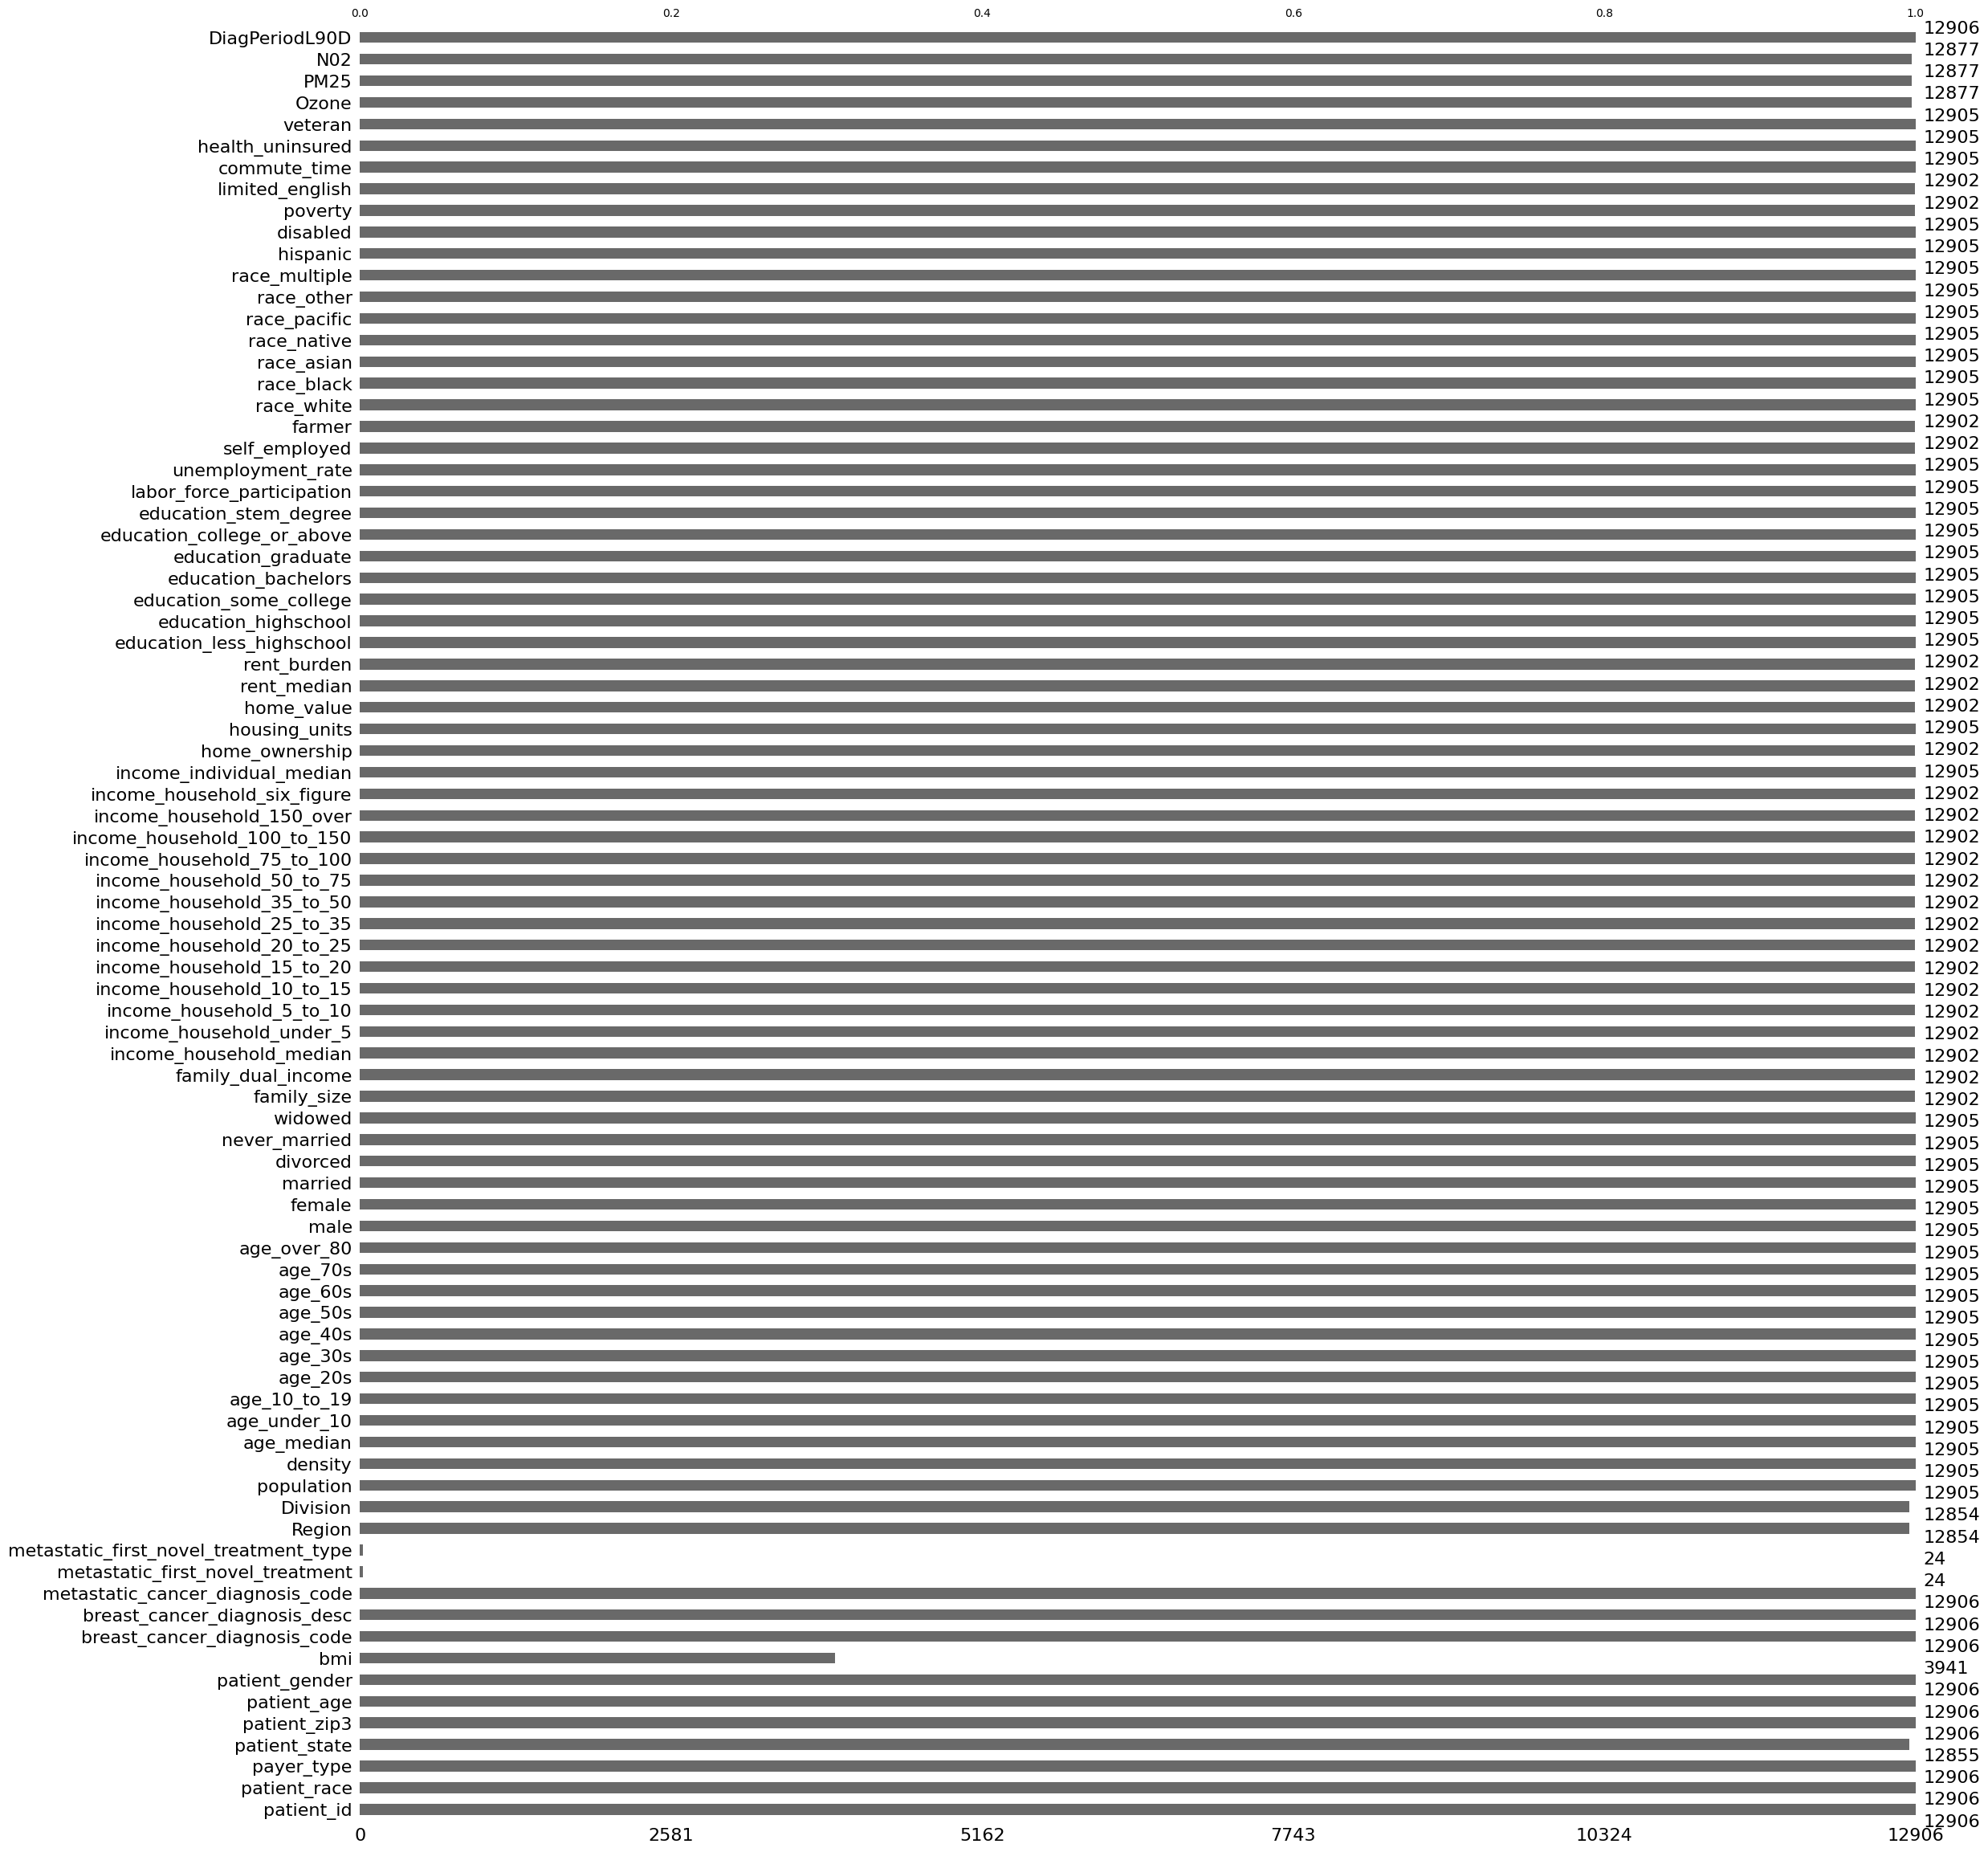

In [43]:
msno.bar(train)

<Axes: >

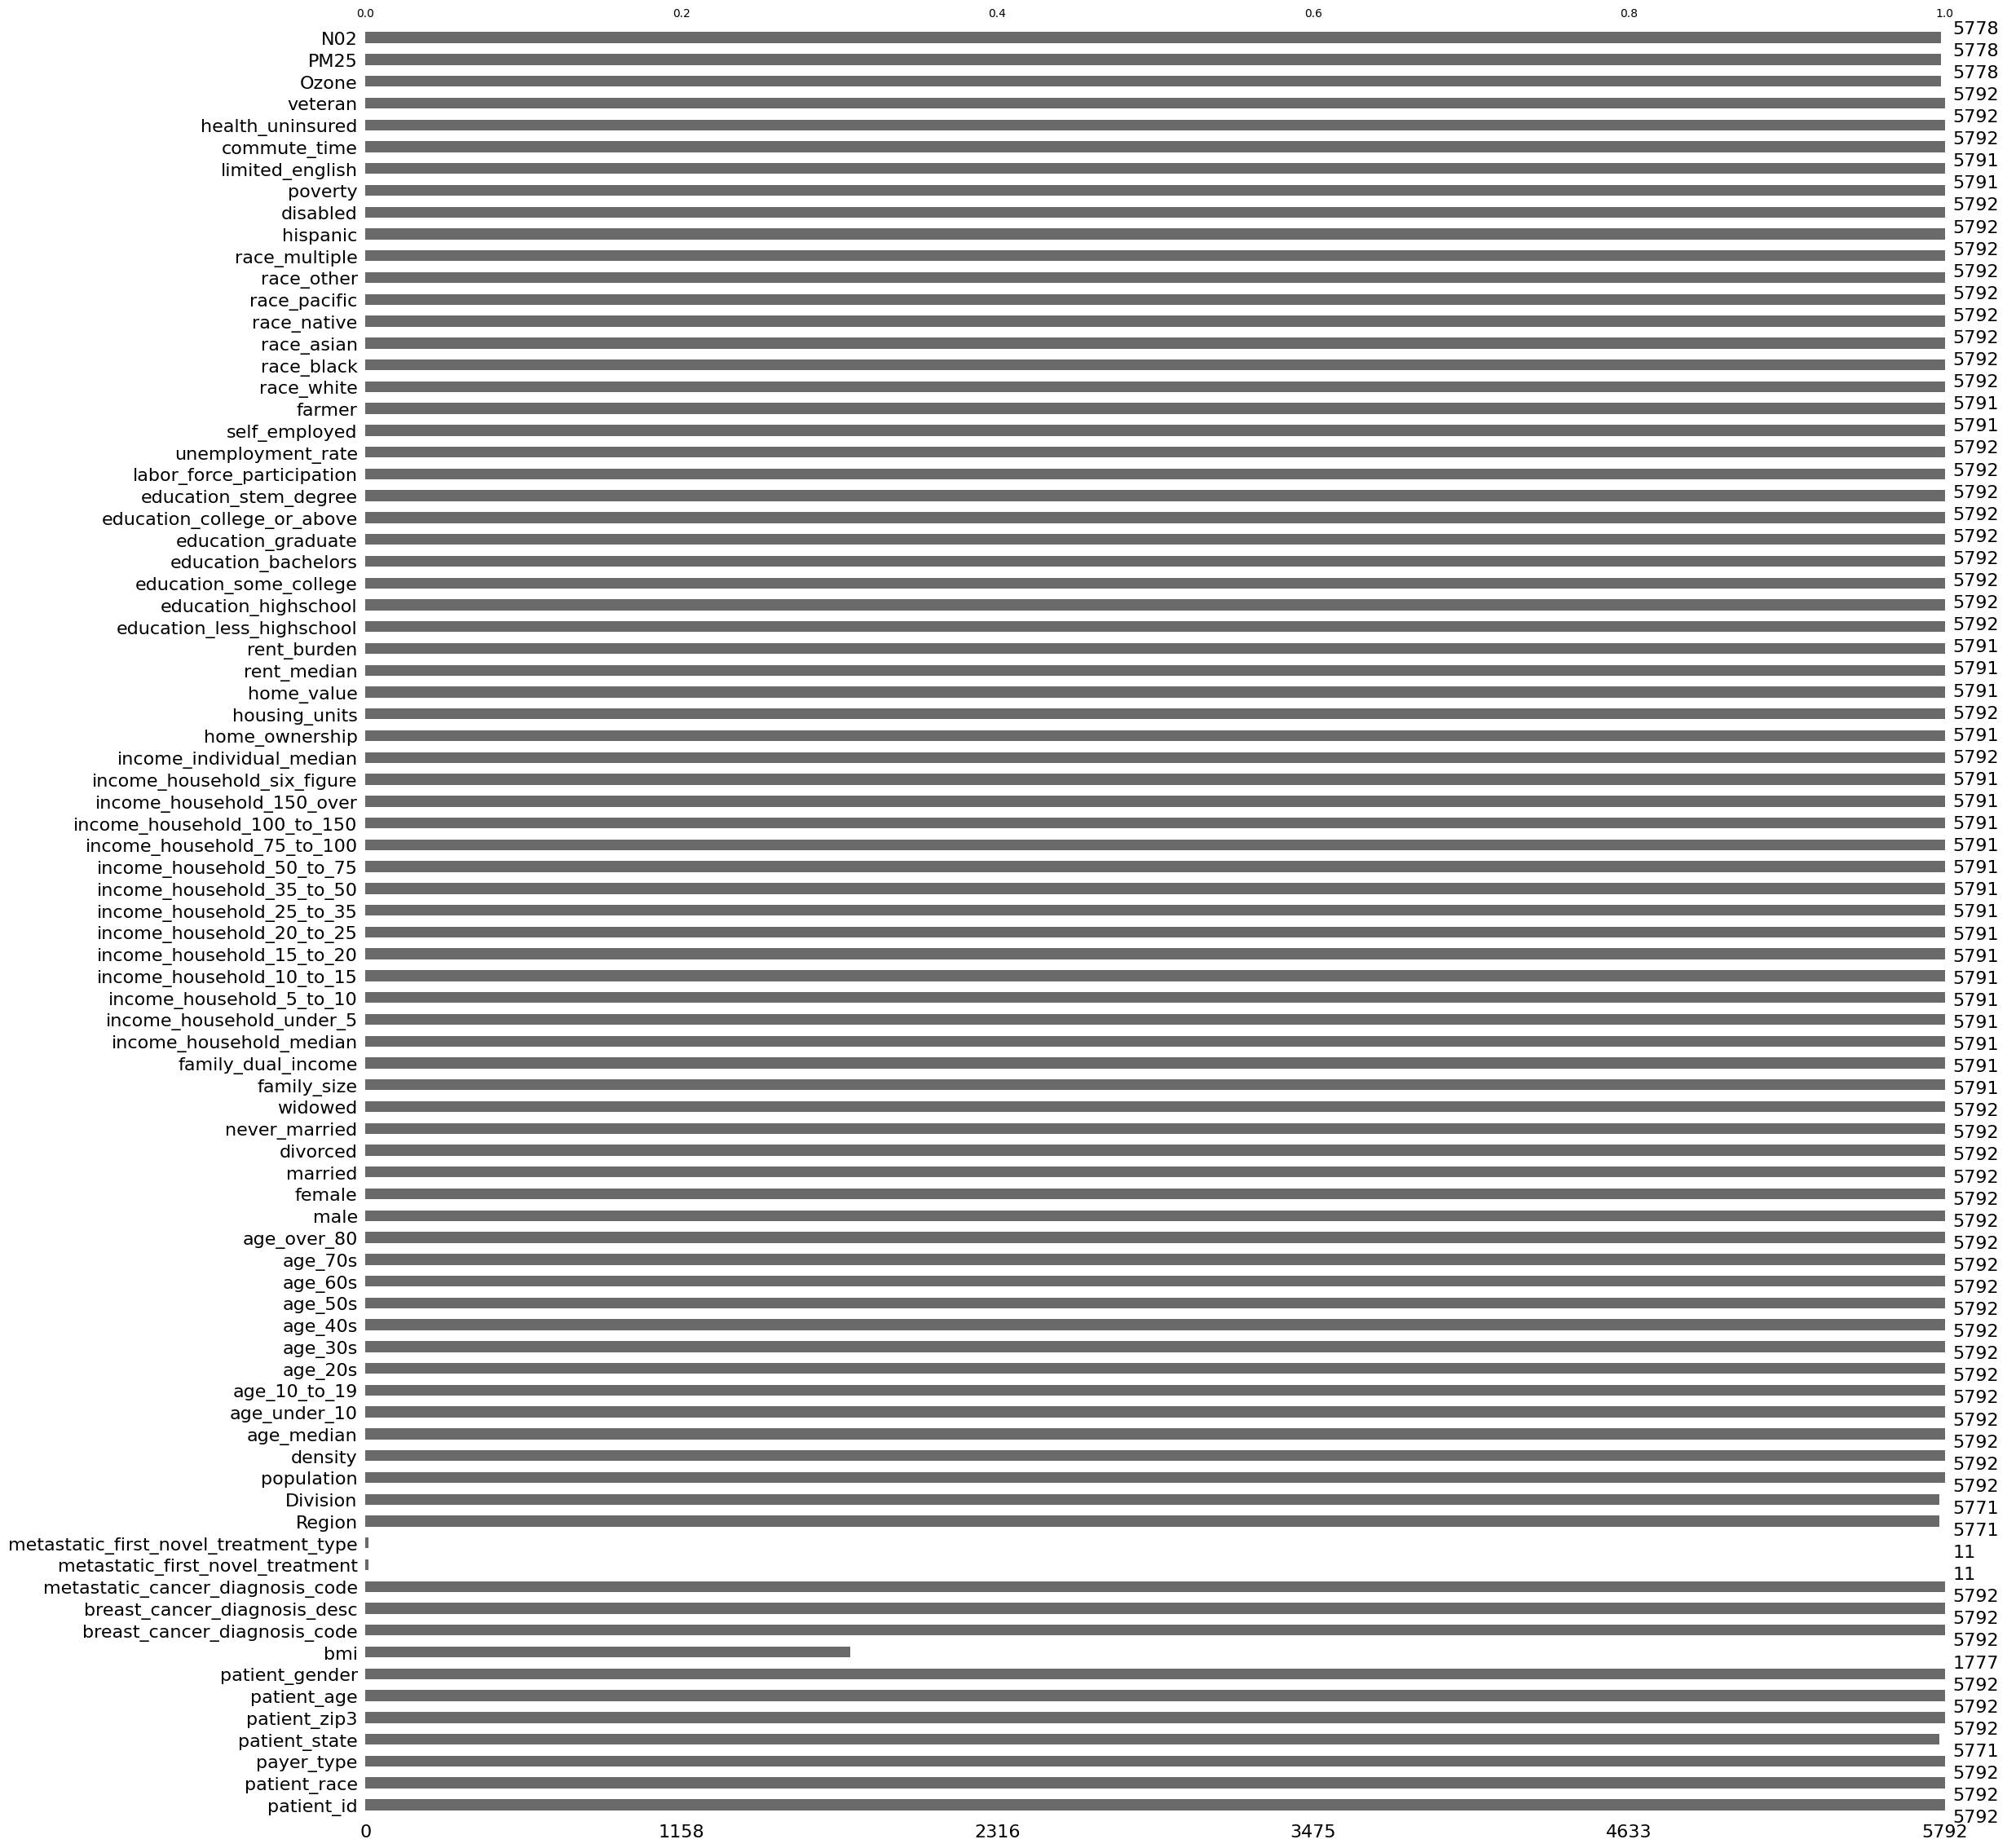

In [44]:
msno.bar(test)

In [45]:
test.shape

(5792, 82)

In [46]:
train.drop(columns = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type',  'bmi'], inplace= True)
test.drop(columns = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type',  'bmi'], inplace= True)

In [47]:
for col in train.columns:
    print(col , train[col].isna().sum())

patient_id 0
patient_race 0
payer_type 0
patient_state 51
patient_zip3 0
patient_age 0
patient_gender 0
breast_cancer_diagnosis_code 0
breast_cancer_diagnosis_desc 0
metastatic_cancer_diagnosis_code 0
Region 52
Division 52
population 1
density 1
age_median 1
age_under_10 1
age_10_to_19 1
age_20s 1
age_30s 1
age_40s 1
age_50s 1
age_60s 1
age_70s 1
age_over_80 1
male 1
female 1
married 1
divorced 1
never_married 1
widowed 1
family_size 4
family_dual_income 4
income_household_median 4
income_household_under_5 4
income_household_5_to_10 4
income_household_10_to_15 4
income_household_15_to_20 4
income_household_20_to_25 4
income_household_25_to_35 4
income_household_35_to_50 4
income_household_50_to_75 4
income_household_75_to_100 4
income_household_100_to_150 4
income_household_150_over 4
income_household_six_figure 4
income_individual_median 1
home_ownership 4
housing_units 1
home_value 4
rent_median 4
rent_burden 4
education_less_highschool 1
education_highschool 1
education_some_college

In [48]:
for col in test.columns:
    print(col , test[col].isna().sum())

patient_id 0
patient_race 0
payer_type 0
patient_state 21
patient_zip3 0
patient_age 0
patient_gender 0
breast_cancer_diagnosis_code 0
breast_cancer_diagnosis_desc 0
metastatic_cancer_diagnosis_code 0
Region 21
Division 21
population 0
density 0
age_median 0
age_under_10 0
age_10_to_19 0
age_20s 0
age_30s 0
age_40s 0
age_50s 0
age_60s 0
age_70s 0
age_over_80 0
male 0
female 0
married 0
divorced 0
never_married 0
widowed 0
family_size 1
family_dual_income 1
income_household_median 1
income_household_under_5 1
income_household_5_to_10 1
income_household_10_to_15 1
income_household_15_to_20 1
income_household_20_to_25 1
income_household_25_to_35 1
income_household_35_to_50 1
income_household_50_to_75 1
income_household_75_to_100 1
income_household_100_to_150 1
income_household_150_over 1
income_household_six_figure 1
income_individual_median 0
home_ownership 1
housing_units 0
home_value 1
rent_median 1
rent_burden 1
education_less_highschool 0
education_highschool 0
education_some_college

# As we can see we're are still left with multiple columns containing few missing values. For now I'll drop those rows for the training set and use forward fill to fill the missing values for the test dataframe.

In [49]:
train.ffill(inplace=True)
test.ffill(inplace=True)

In [50]:
num_col = []
for col in train.columns:
    if train[col].dtypes in ['float64' , 'int64']:
        num_col.append(col)

In [51]:
print(num_col)

['patient_id', 'patient_age', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree', 'labor_force_participation', 'unemployment_rate'

In [52]:
train_num= train[num_col]

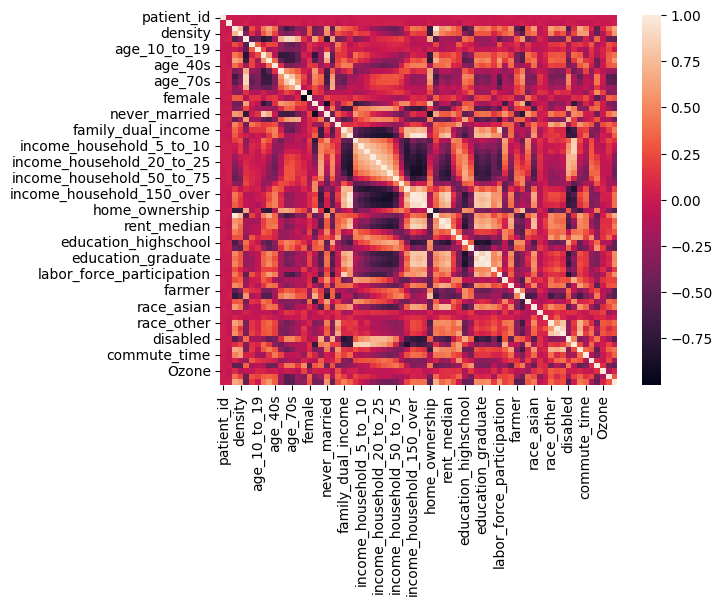

In [53]:
corr = train_num.corr()
sns.heatmap(corr)
plt.show()

# The correlation data is unreadable. I'll create two separate dataframes one with mostly demographic data and the other one with the remaining columns. I'll be able to identify highly correlated features and if needed remove them from the dataset

In [54]:
train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'Region', 'Division', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median',

In [55]:
other_cols = ['population','male', 'female','density', 'age_median', 'labor_force_participation',
       'unemployment_rate', 'self_employed', 'farmer', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'disabled', 'poverty', 'limited_english',
       'commute_time', 'health_uninsured', 'veteran','Ozone', 'PM25', 'N02',
       'DiagPeriodL90D']

In [56]:
demo_cols = ['age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
        'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'hispanic', 'DiagPeriodL90D']

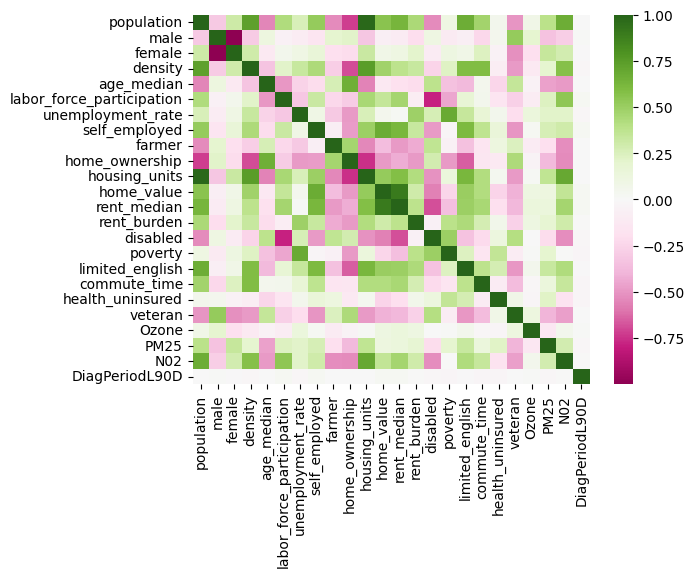

In [57]:
corr = train[other_cols].corr()
sns.heatmap(corr, cmap='PiYG')
plt.show()

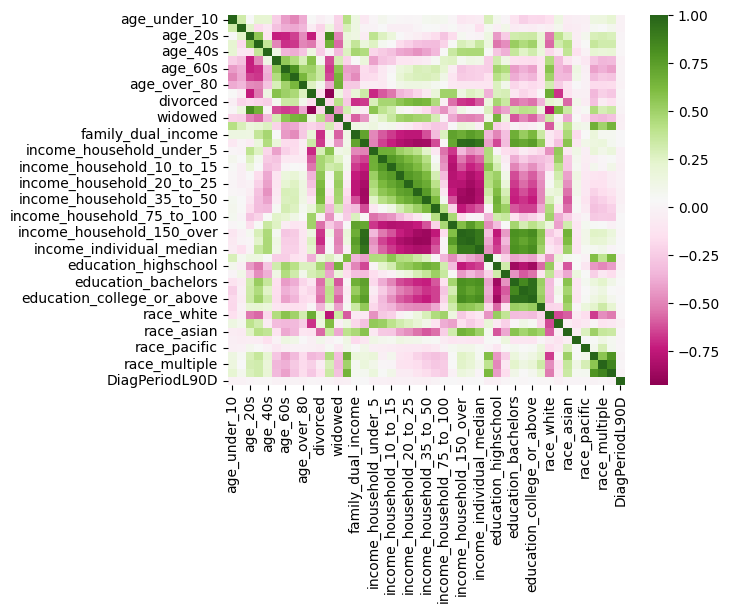

In [58]:
corr = train[demo_cols].corr()
sns.heatmap(corr, cmap='PiYG')
plt.show()

In [59]:
for col in test.columns:
    print(col , test[col].isna().sum())

patient_id 0
patient_race 0
payer_type 0
patient_state 0
patient_zip3 0
patient_age 0
patient_gender 0
breast_cancer_diagnosis_code 0
breast_cancer_diagnosis_desc 0
metastatic_cancer_diagnosis_code 0
Region 0
Division 0
population 0
density 0
age_median 0
age_under_10 0
age_10_to_19 0
age_20s 0
age_30s 0
age_40s 0
age_50s 0
age_60s 0
age_70s 0
age_over_80 0
male 0
female 0
married 0
divorced 0
never_married 0
widowed 0
family_size 0
family_dual_income 0
income_household_median 0
income_household_under_5 0
income_household_5_to_10 0
income_household_10_to_15 0
income_household_15_to_20 0
income_household_20_to_25 0
income_household_25_to_35 0
income_household_35_to_50 0
income_household_50_to_75 0
income_household_75_to_100 0
income_household_100_to_150 0
income_household_150_over 0
income_household_six_figure 0
income_individual_median 0
home_ownership 0
housing_units 0
home_value 0
rent_median 0
rent_burden 0
education_less_highschool 0
education_highschool 0
education_some_college 0


In [60]:
pruned_cols = ['patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'Region', 'Division','population', 'female','density', 'age_median', 'labor_force_participation',
       'unemployment_rate', 'self_employed', 'farmer', 'income_individual_median', 'education_less_highschool','married', 'divorced', 'never_married', 'widowed', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'disabled', 'poverty', 'limited_english',
       'commute_time', 'health_uninsured', 'veteran','race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'hispanic','Ozone', 'PM25', 'N02']

In [61]:
import missingno as msno 

# As we can see from the number there are no missing values left. We can also inspect this visually using missingno package and its matrix function

<Axes: >

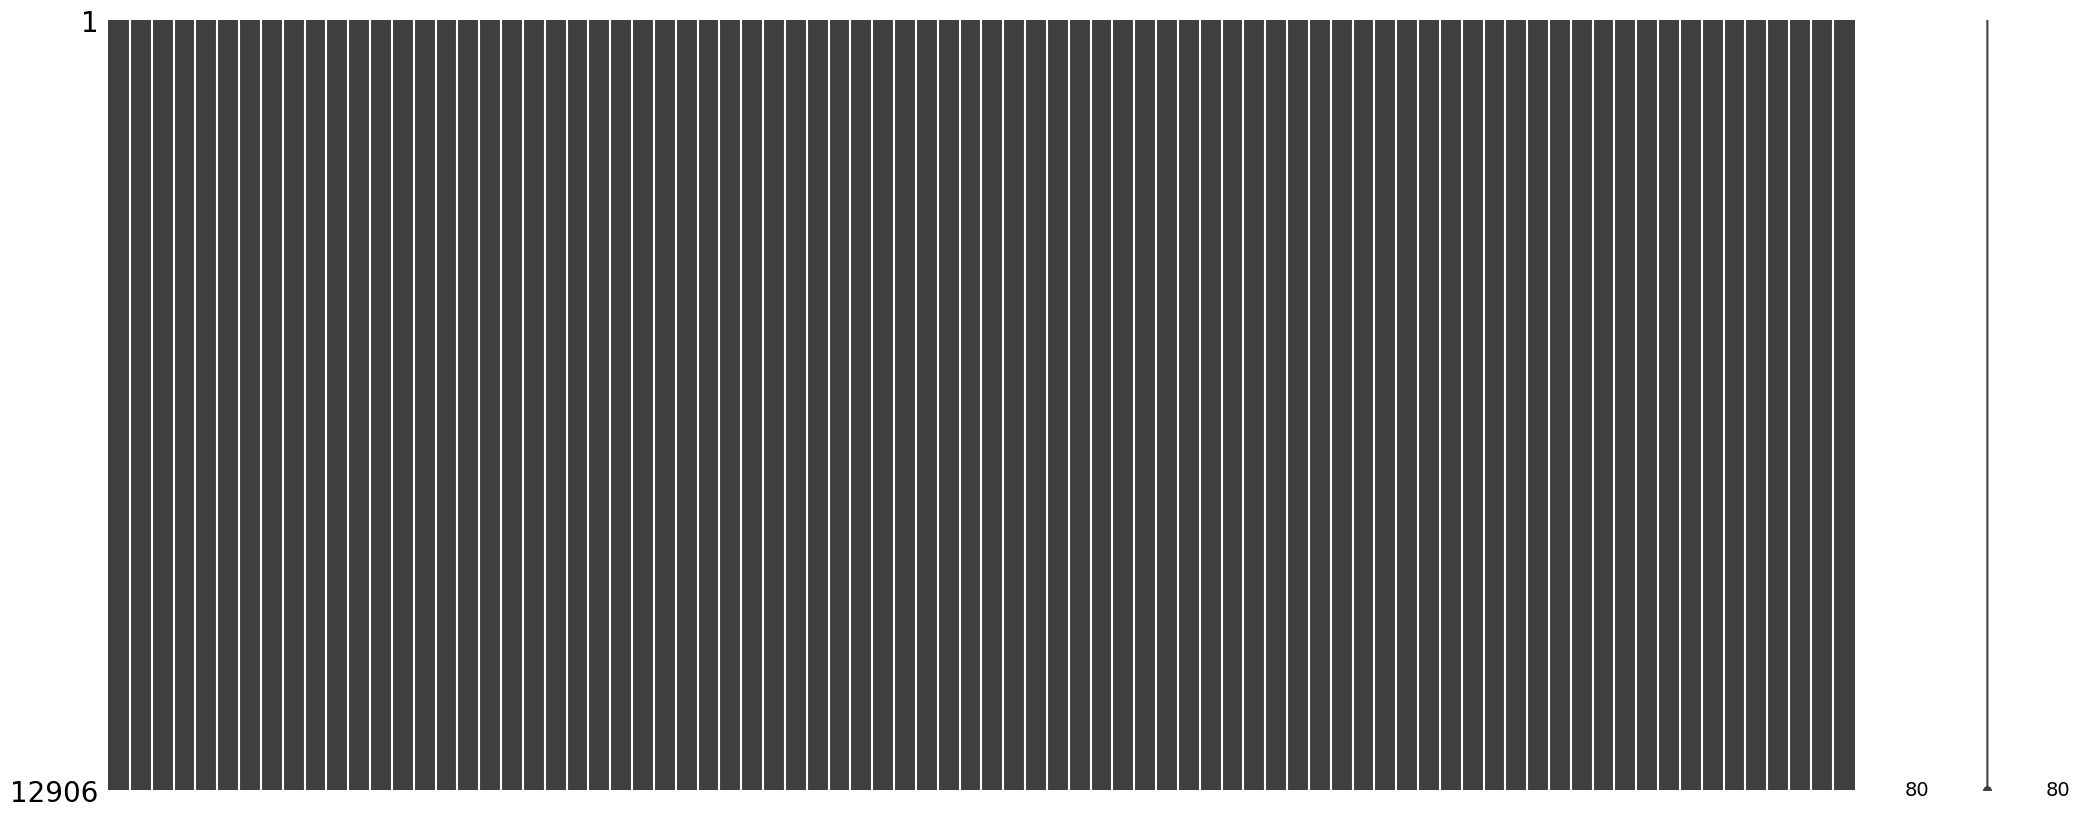

In [62]:
msno.matrix(train)

<Axes: >

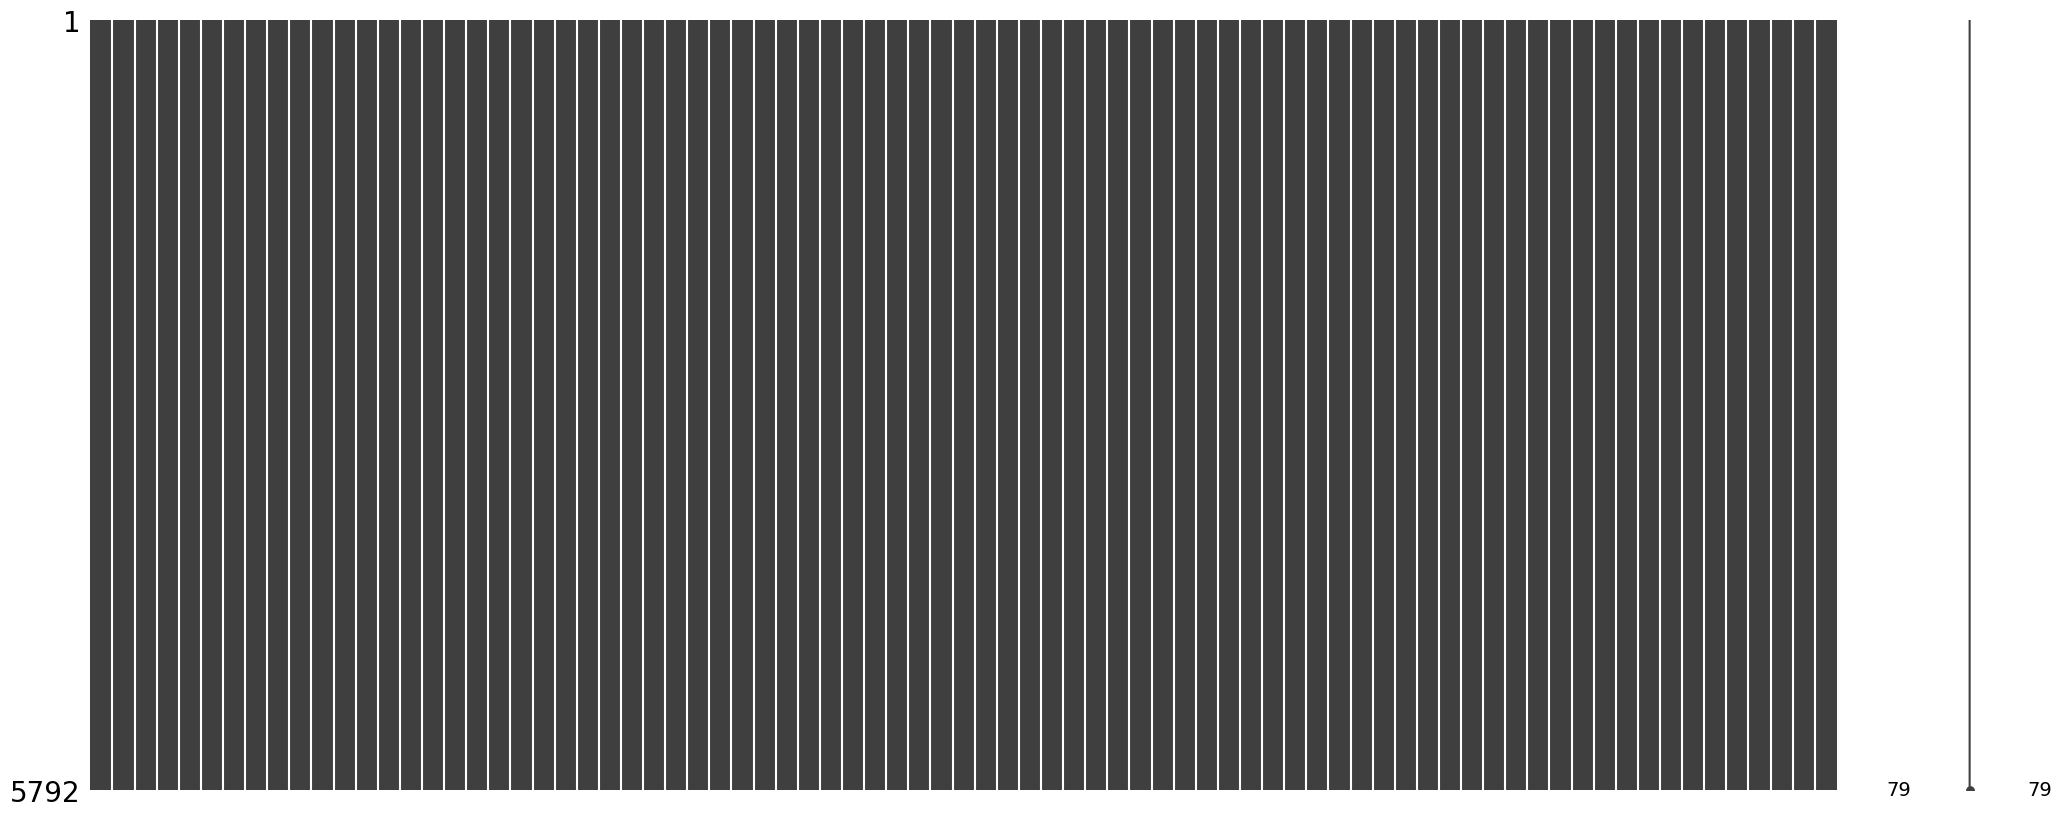

In [63]:
msno.matrix(test)

# After this very quick cleaning we have dataframes that we can easily feed into a XGB Classifier. Let's do some RandomizedSearchCV, let's encode the target value using Label Encoder. And finally we can predict the probablities.

In [64]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [65]:
train_pruned = train[pruned_cols]

In [66]:
le = LabelEncoder()
X = train_pruned
y = le.fit_transform(train['DiagPeriodL90D'])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, shuffle=True, random_state=66)

In [69]:
params = {
        'booster' : ['gbtree',' gblinear', 'dart'],
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [ 5, 7, 10],
        'learning_rate' : [0.001, 0.01, 0.05],
        'n_estimators' : [ 1000, 2000, 3000]
        }

In [ ]:
xgb_new = XGBClassifier(objective='binary:logistic', enable_categorical=True)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 66)
random_new = RandomizedSearchCV(xgb_new, param_distributions=params, n_iter=100, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=66 )
random_new.fit(X_train, y_train)
print(random_new.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


# roc score for our X_test is 0.8079 which is not bad for a baseline model

In [ ]:
test_proba = random_new.predict_proba(X_test)
score_proba = roc_auc_score(y_test, test_proba[:, 1])
print(score_proba)

In [ ]:
test_pred = random_new.predict(X_test)
score_pred = roc_auc_score(y_test, test_pred)
print(score_pred)

In [ ]:
best = random_new.best_estimator_

In [ ]:
best_features = best.feature_importances_

In [ ]:
features = {'name': X.columns, 'importance': best_features}
feat_dict = pd.DataFrame(features)
feat_dict.head()

In [ ]:
feat_dict.sort_values(by='importance', ascending = False, inplace= True)
feat_dict.head(10)

In [ ]:
plt.bar(range(len(best_features)), best_features)
plt.show()

#From the feature importances we can deduce that diagnosis code and description are most important features in predicting the DiagPeriodL90D. That means that probably some types of cancer need more time to be diagnosed than the other types.

In [ ]:
for idx, feat in enumerate(X.columns):
    print(feat, best_features[idx])

# Let's predict the probablities for our test dataframe and submit them

In [ ]:
test_pruned = test[pruned_cols]

In [ ]:
sub_proba = random_new.predict_proba(test_pruned)
test['DiagPeriodL90D'] = sub_proba[:, 1]
sub = test[['patient_id','DiagPeriodL90D']]
sub.head()

In [ ]:
sub.to_csv('submission.csv', index=False)

# The score of my submission is 0.781. So in the next iteration I'll focus on data cleaning and maybe some features engineering